In [1]:
install.packages("igraph")
install.packages("pracma")

library('igraph')
library('Matrix')
library('pracma')
library('data.table')

library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




# QUESTION 1

(a)

[1] "p=0.003: Mean=2.980000, Variance=2.928529"


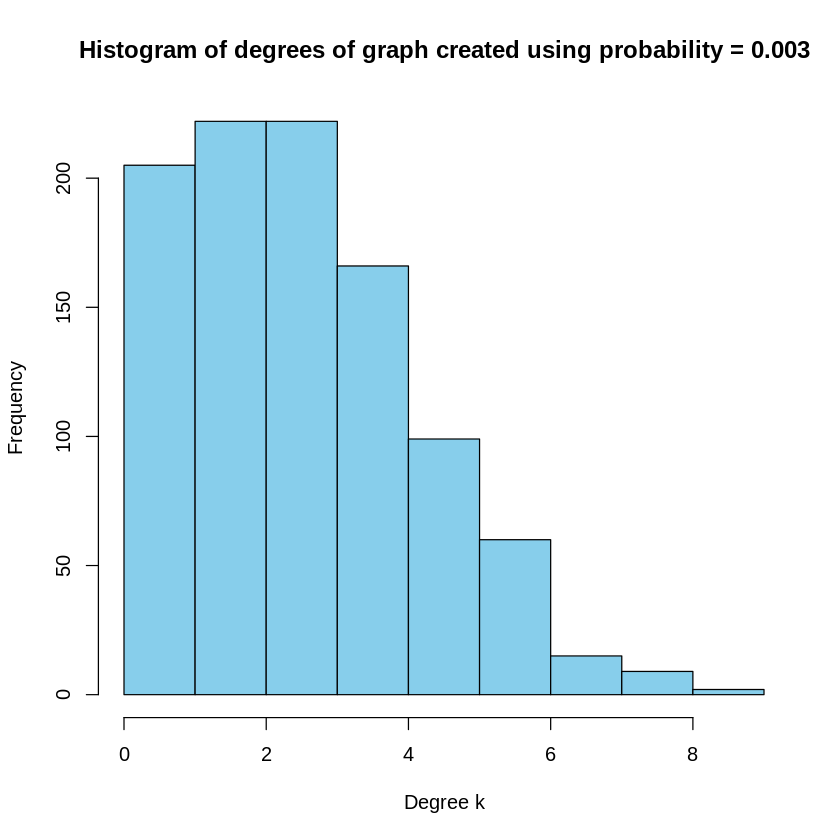

[1] "p=0.004: Mean=3.884000, Variance=3.750294"


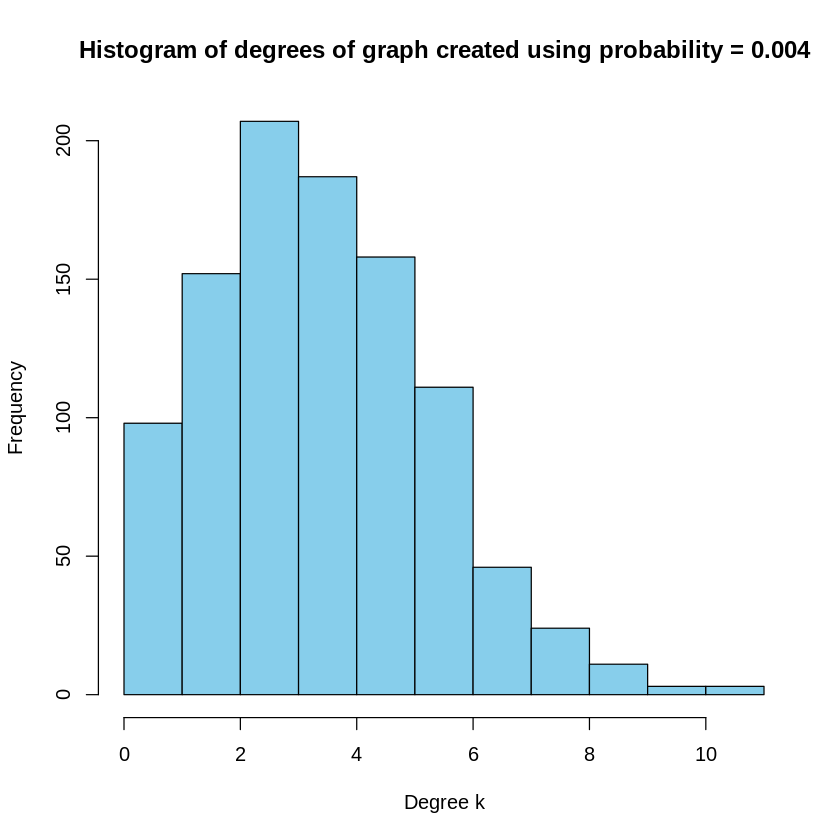

[1] "p=0.010: Mean=10.122000, Variance=9.628745"


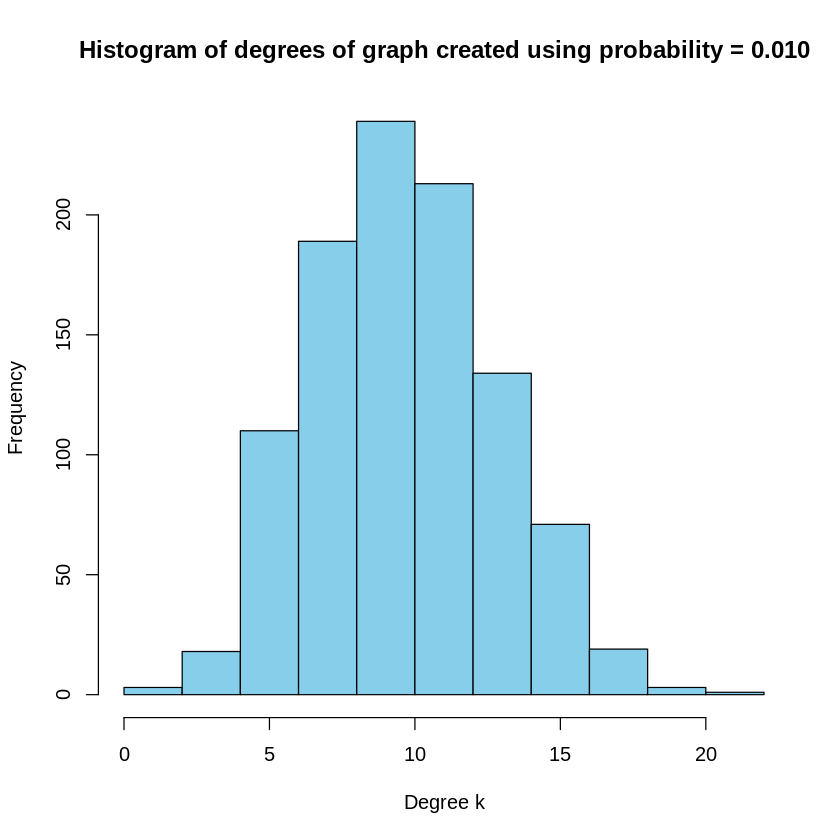

[1] "p=0.050: Mean=49.906000, Variance=46.079243"


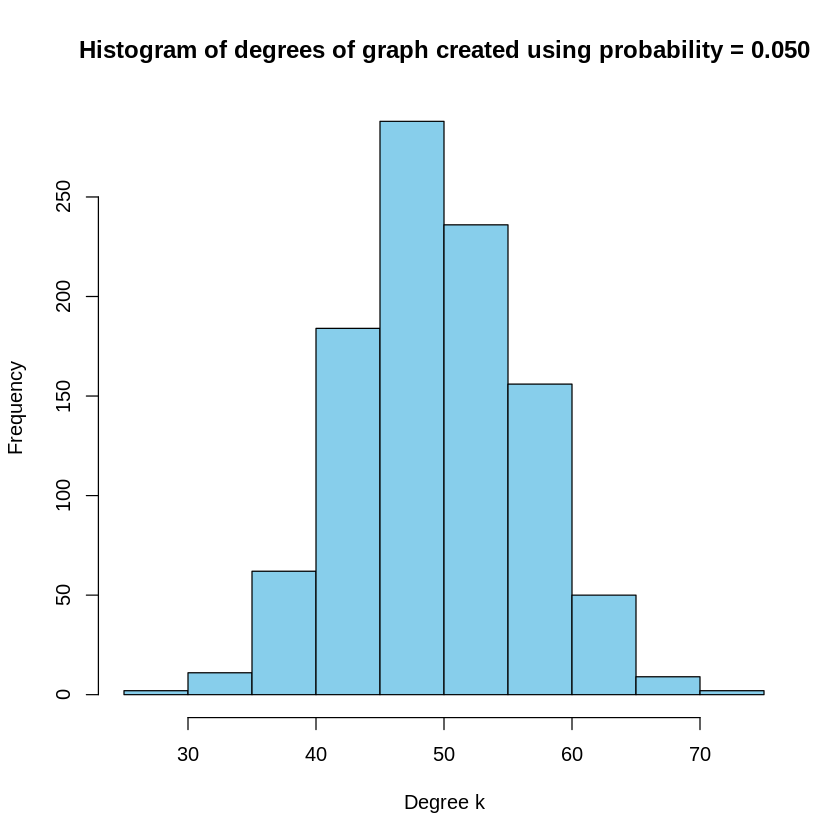

[1] "p=0.100: Mean=100.076000, Variance=90.080304"


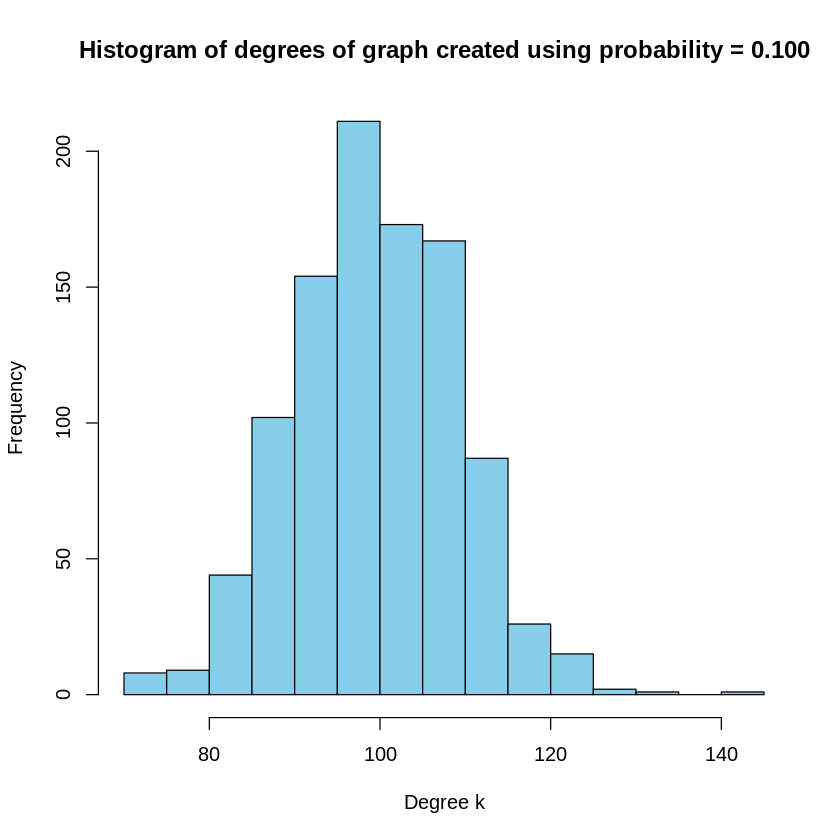

In [ ]:
nodes <- 1000
probabilities <- list(0.003,0.004, 0.01, 0.05, 0.1)
for (p in probabilities) {
    graph <- sample_gnp(nodes, p, directed=FALSE)
    hist(degree(graph),
     xlab = "Degree k",
     ylab = "Frequency",
     main = sprintf("Histogram of degrees of graph created using probability = %.3f", p),
     col = "skyblue"
    )
    print(sprintf("p=%.3f: Mean=%f, Variance=%f", p, mean(degree(graph)), var(degree(graph))))

    # degree_distribution(graph, cumulative = FALSE)
}

(b)

In [ ]:
gcc_p = function(nodes, p) {
    gcc_flag = TRUE
    cnt = 0
    d = -1
    node = -1
    edge = -1
    for (i in 1:nodes) {
        g <- sample_gnp(nodes, p, directed = FALSE)
        if (is_connected(g)){
            cnt <- cnt + 1
        }
        else if (!is_connected(g)){
            if(gcc_flag){
                g.components <- clusters(g)
                idx <- which.max(g.components$csize)
                g.giant <- induced.subgraph(g, which(g.components$membership == idx))
                d <- diameter(g.giant, directed = FALSE)
                node <- vcount(g.giant)
                edge <- ecount(g.giant)
                gcc_flag = FALSE
            }
        }
    }
    print("-----------------------------------------------------------------------------------------------------------------------------")
    print(sprintf("Probability that a generated network is connected with p = %0.3f: %f", p, cnt/1000))
    print(sprintf("Diameter of GCC: %d", d))
    print(sprintf("Number of nodes of GCC: %d", node))
    print(sprintf("Number of edges of GCC: %d", edge))
    print("Note: -1 means there is no non-connected network.")
    print("-----------------------------------------------------------------------------------------------------------------------------")
}

In [ ]:
for (p in probabilities){
    gcc_p(nodes, p)
}

[1] "-----------------------------------------------------------------------------------------------------------------------------"
[1] "Probability that a generated network is connected with p = 0.003: 0.000000"
[1] "Diameter of GCC: 14"
[1] "Number of nodes of GCC: 946"
[1] "Number of edges of GCC: 1502"
[1] "Note: -1 means there is no non-connected network."
[1] "-----------------------------------------------------------------------------------------------------------------------------"
[1] "-----------------------------------------------------------------------------------------------------------------------------"
[1] "Probability that a generated network is connected with p = 0.004: 0.000000"
[1] "Diameter of GCC: 11"
[1] "Number of nodes of GCC: 970"
[1] "Number of edges of GCC: 1937"
[1] "Note: -1 means there is no non-connected network."
[1] "-----------------------------------------------------------------------------------------------------------------------------"
[1] "---

(c)

In [ ]:
probabilities <- seq(from=0,to=0.009,by=0.0001)
GCCSizeMeans <- rep(0, length(probabilities))
matrixGCCSizes <- matrix(data=0.0, nrow=100, ncol=length(probabilities))
i <- 1
for (p in probabilities) {
    for (times in 1:100) {
        graph <- sample_gnp(nodes, p, directed=FALSE)
        graphComponents <- clusters(graph)
        matrixGCCSizes[times, i] <- max(graphComponents$csize) / 1000
    }
    GCCSizeMeans[i] <- mean(matrixGCCSizes[, i])
    i <- i + 1
}

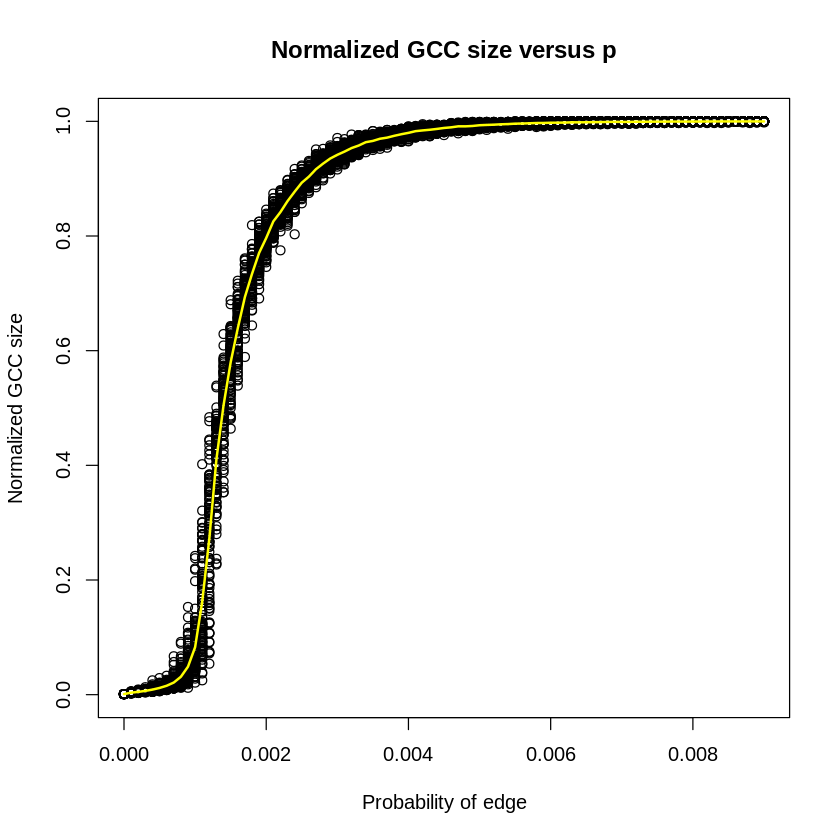

In [ ]:
plot(rep(probabilities[1],100),matrixGCCSizes[,1],
    xlim = c(0,0.009), 
    ylim = c(0,1.00),
    xlab="Probability of edge",
    main = "Normalized GCC size versus p",
    ylab="Normalized GCC size")

j = 2
for (p in probabilities[2:length(probabilities)]){
    points(rep(p,100),matrixGCCSizes[,j])
    j <- j+1
}
lines(probabilities,GCCSizeMeans,lwd=2,col="yellow")

(d)

In [ ]:
nNodes <- seq(100,10000,50)
expectedGCC = function(nNodes, c) {
    nNodes = nNodes
    q = matrix(data = 0.0, nrow = 100, ncol = length(nNodes))
    r = matrix(data= 0.0, nrow=length(nNodes),ncol=1)
    c = c
    j = 1
    for (n in nNodes){
        for (i in 1:100){
        g <- sample_gnp(n,c/n,directed = FALSE)
        g.components <- clusters(g)
        q[i,j] <- max(g.components$csize)  
        }
        r[j] <- mean(q[,j])
        j <- j+1
    }
    return(r)
}

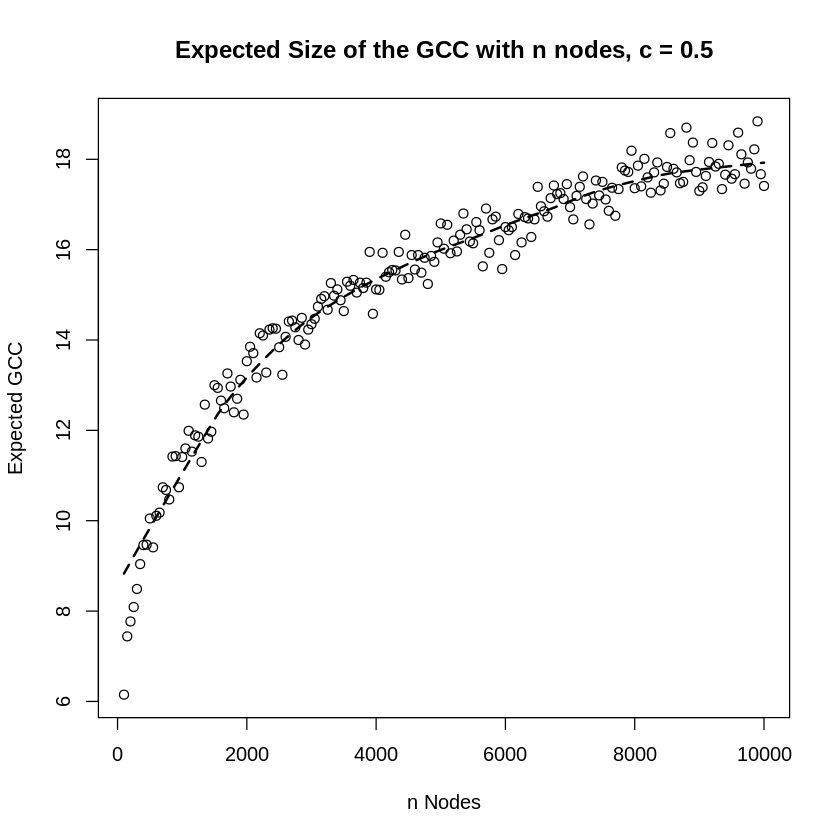

In [ ]:
r1 = expectedGCC(nNodes, 0.5)
plot(nNodes,r1,xlab="n Nodes",main = paste("Expected Size of the GCC with n nodes, c = 0.5"),ylab="Expected GCC")
lines(lowess(nNodes,r1,f = 0.3),lwd = 2,lty=2)

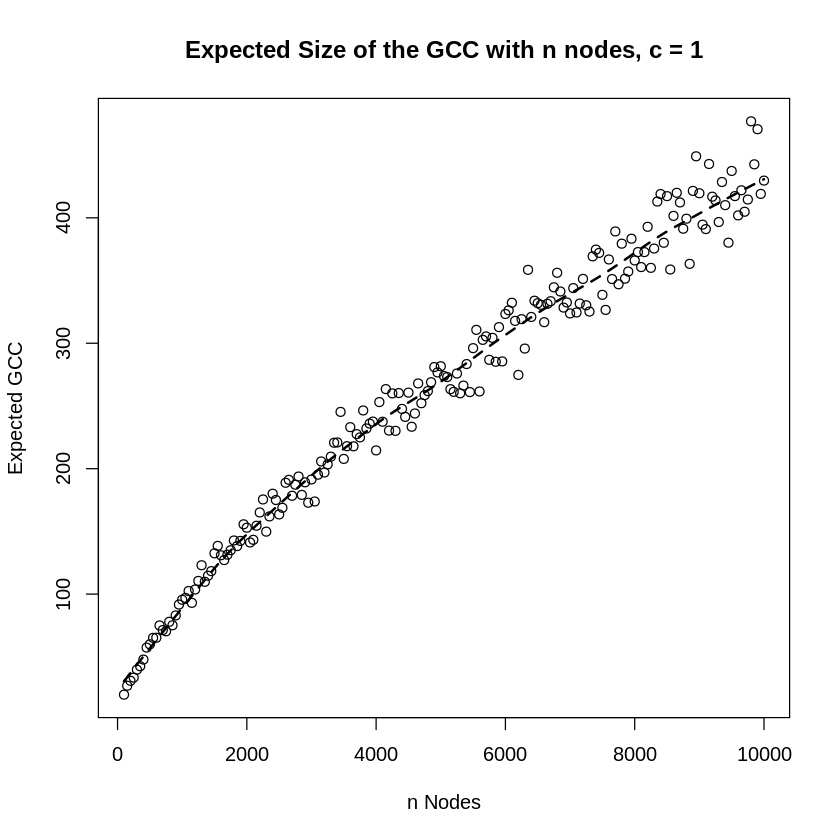

In [ ]:
r2 = expectedGCC(nNodes, 1)
plot(nNodes,r2,xlab="n Nodes",main = paste("Expected Size of the GCC with n nodes, c = 1"),ylab="Expected GCC")
lines(lowess(nNodes,r2,f = 0.3),lwd = 2,lty=2)

In [ ]:
ra = expectedGCC(nNodes, 1.1)
rb = expectedGCC(nNodes, 1.2)
rc = expectedGCC(nNodes, 1.3)

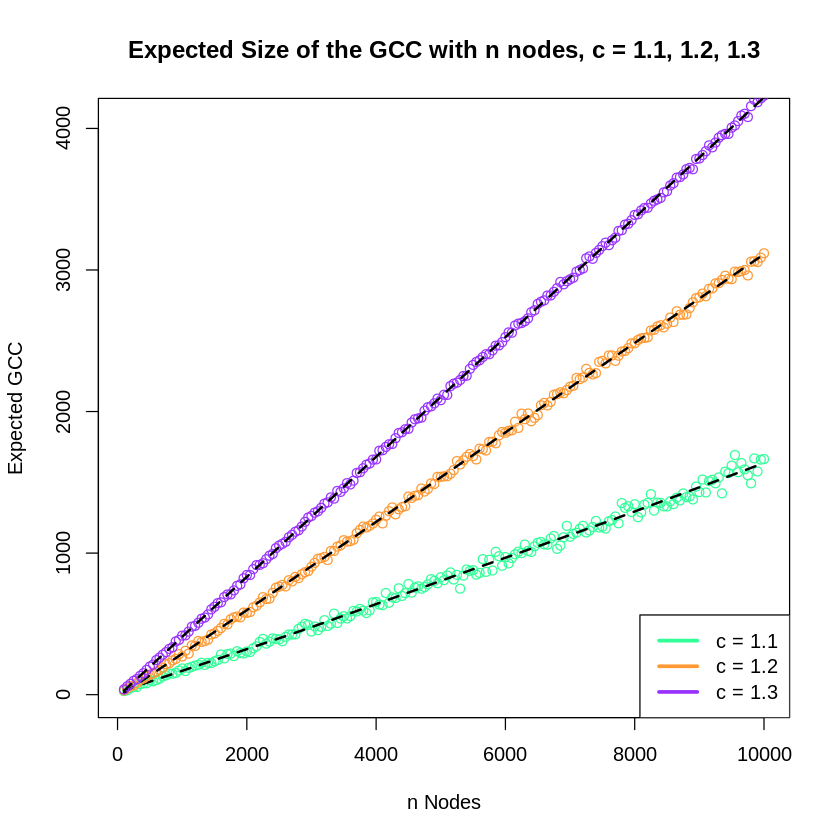

In [ ]:
plot(nNodes,ra,xlab="n Nodes",main = paste("Expected Size of the GCC with n nodes, c = 1.1, 1.2, 1.3"),ylab="Expected GCC", col="#33FF99",ylim = c(0,4050))
lines(lowess(nNodes,ra,f = 0.5), lwd = 2,lty=2)
points(nNodes,rb,xlab="n Nodes",col="#FF9933")
lines(lowess(nNodes,rb,f = 0.5), lwd = 2,lty=2)
points(nNodes,rc,xlab="n Nodes",col="#9933FF")
lines(lowess(nNodes,rc,f = 0.5), lwd = 2,lty=2)
legend('bottomright', legend = c("c = 1.1", "c = 1.2", "c = 1.3"), lty = c(1, 1, 1), lwd = c(3,3,3), col = c("#33FF99", "#FF9933","#9933FF"))

# QUESTION 2

(a)

In [2]:
functionGraph <- function(nodes, m) {
    count <- 0
    for (i in 1:nodes) {
        graph <- sample_pa(nodes, m = m, directed=FALSE)
        if(is_connected(graph)) {
            count <- count + 1
        }
    }
    print(sprintf("Total number of Barabasi graphs generated: %d, Number of connected graphs: %d", nodes, count))
    plot(graph, 
        edge.arrow.size=.1, 
        vertex.size=2, 
        vertex.label=NA,
        main=sprintf("Graph: Preferential Attachment with number of nodes = %d, m = %d", nodes, m)
    )
    return(graph)
}

(b)

In [3]:
functionCommunityModularity <- function(graph) {
    communityStructure <- cluster_fast_greedy(graph)
    modularity <- modularity(communityStructure)
    print(sprintf("Modularity: %.5f",modularity))
    plot(graph, 
        mark.groups = groups(communityStructure), 
        vertex.size=2, 
        vertex.label=NA,
        main="Community Structure"
    )
}

(d)

In [9]:
functionDegreeDistIntercept <- function(graph, nodes, m) {
    par(xpd = FALSE)
    degreeDistribution = degree.distribution(graph)
    logDegree <- log2(c(1:length(degreeDistribution)))[which(degreeDistribution !=0, arr.ind = TRUE)]
    logDistribution <- log2(degreeDistribution)[which(degreeDistribution !=0, arr.ind = TRUE)]    
    plot(logDegree, logDistribution,
        main=sprintf("Log Degree Distribution of the Network with n = %d, m = %d",nodes, m),
        xlab="log(Degree)",
        ylab="log(Probability)",
        grid(),
        col="blue"
    )
    lines(logDegree,logDistribution,lty=2,col="blue")
    abline(lm(logDistribution ~ logDegree),col="blue",lwd=2)
    print(lm(logDistribution ~ logDegree))
}

(e)

In [11]:
functionRandomSampling <- function(graph, nodes, m) {
    par(xpd = FALSE)
    matrixDegrees <- matrix(data=0.0,nrow=nodes,ncol=1)
    for (i in 1:nodes){
        sampledNode = sample(nodes,1)
        sampledNeighbour = neighbors(graph,sampledNode)
        if(length(sampledNeighbour)>1){
            sampledNeighbour = sample(sampledNeighbour,1)
        }
        matrixDegrees[i] = degree(graph,sampledNeighbour)    
    }

    distribution = table(matrixDegrees)
    distributionNodes = log2(as.numeric(distribution)/nodes)
    degreeNodes = log2(as.numeric(names(distribution)))

    plot(degreeNodes,distributionNodes,main=sprintf("Log Degree Distribution with n = %d, m = %d, RANDOM SAMPLING",nodes, m),
        xlab="log(Degree)",ylab="log(Probability)",grid(),col="red")
    lines(degreeNodes,distributionNodes,lty=2,col="red")
    abline(lm(distributionNodes ~ degreeNodes),col="red", lwd=2)

    print(lm(distributionNodes ~ degreeNodes))
}

(f)

In [12]:
functionExpectedDegree <- function(graph, nodes, m) {
    ageDegree <-rev(degree(graph)[1:1000])
    plot(ageDegree,type='l',main=sprintf("Degrees vs Age for n = %d, m = %d", nodes, m),xlab="Age",ylab="Degree")
}

Wrapper Function

In [13]:
graphCommunityPlotSlope <- function(nodes, m) {
    graph <- functionGraph(nodes, m)
    functionCommunityModularity(graph)
    functionDegreeDistIntercept(graph, nodes, m)
    functionRandomSampling(graph, nodes, m)
    functionExpectedDegree(graph, nodes, m)
}

[1] "Total number of Barabasi graphs generated: 1000, Number of connected graphs: 1000"
[1] "Modularity: 0.93266"


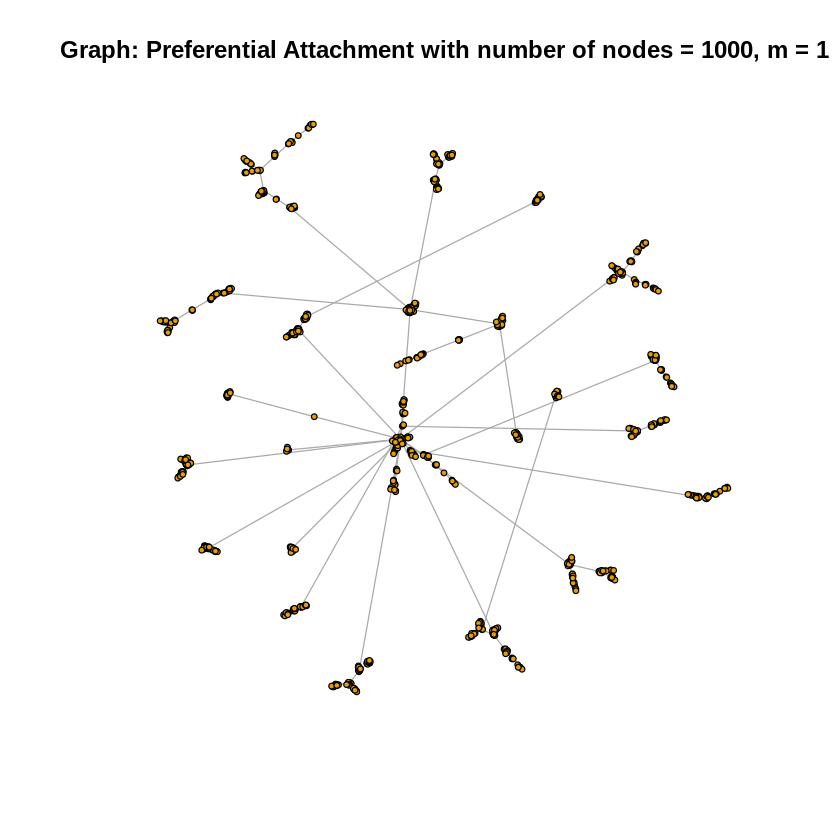

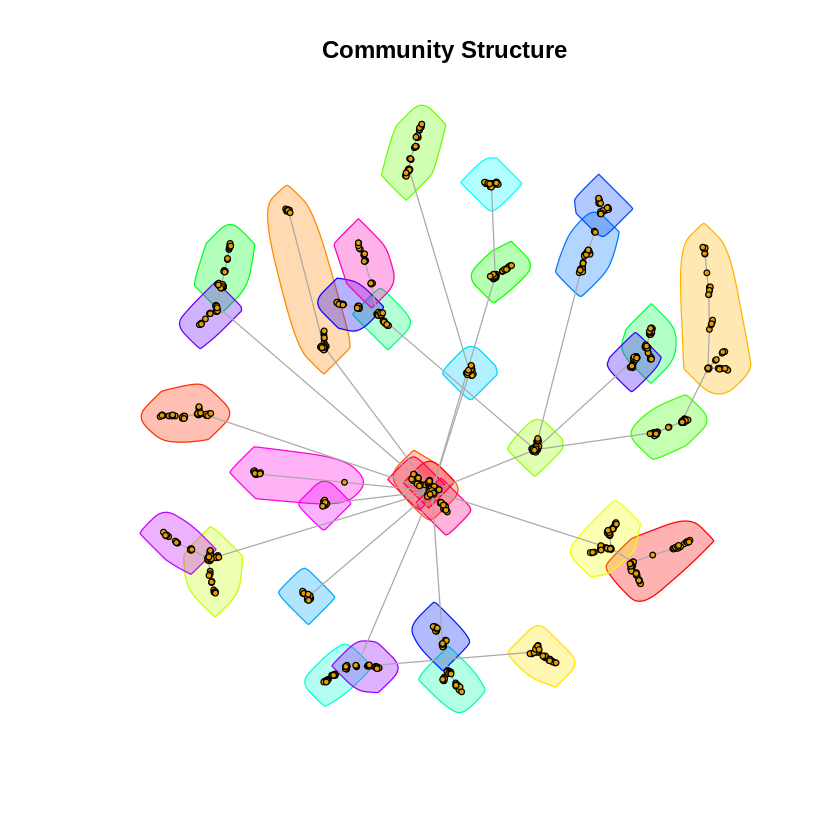


Call:
lm(formula = logDistribution ~ logDegree)

Coefficients:
(Intercept)    logDegree  
     0.8065      -2.4048  



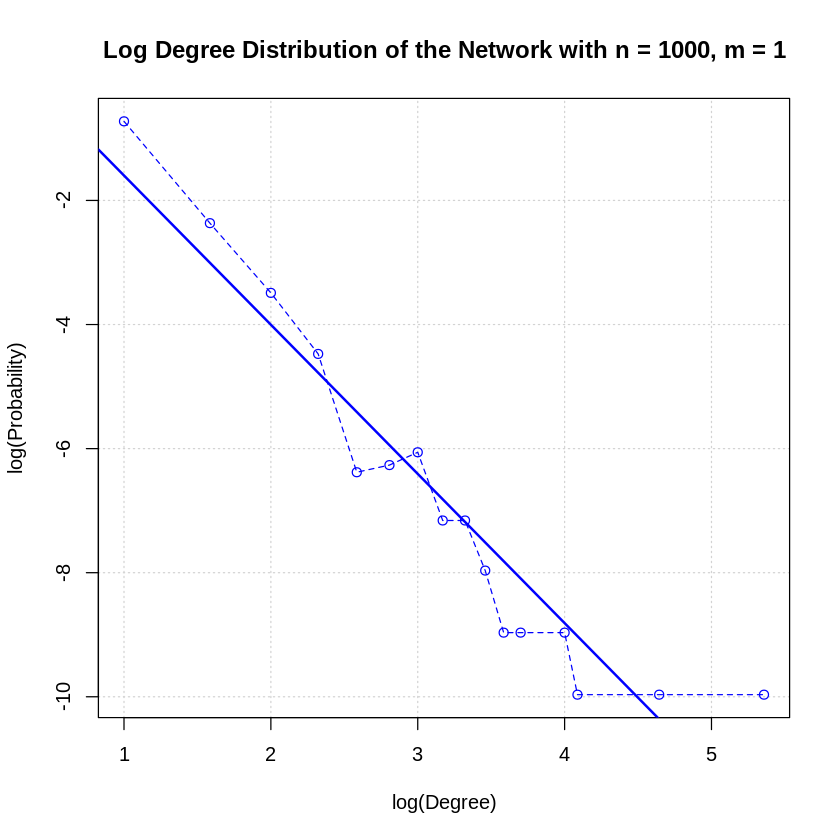


Call:
lm(formula = distributionNodes ~ degreeNodes)

Coefficients:
(Intercept)  degreeNodes  
    -1.8342      -0.9752  



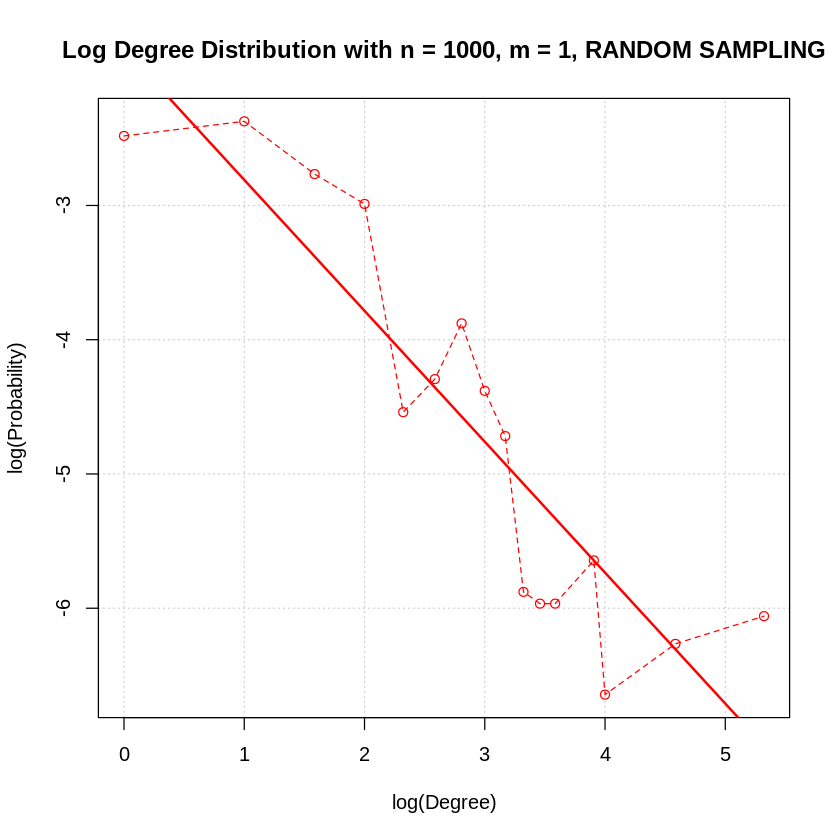

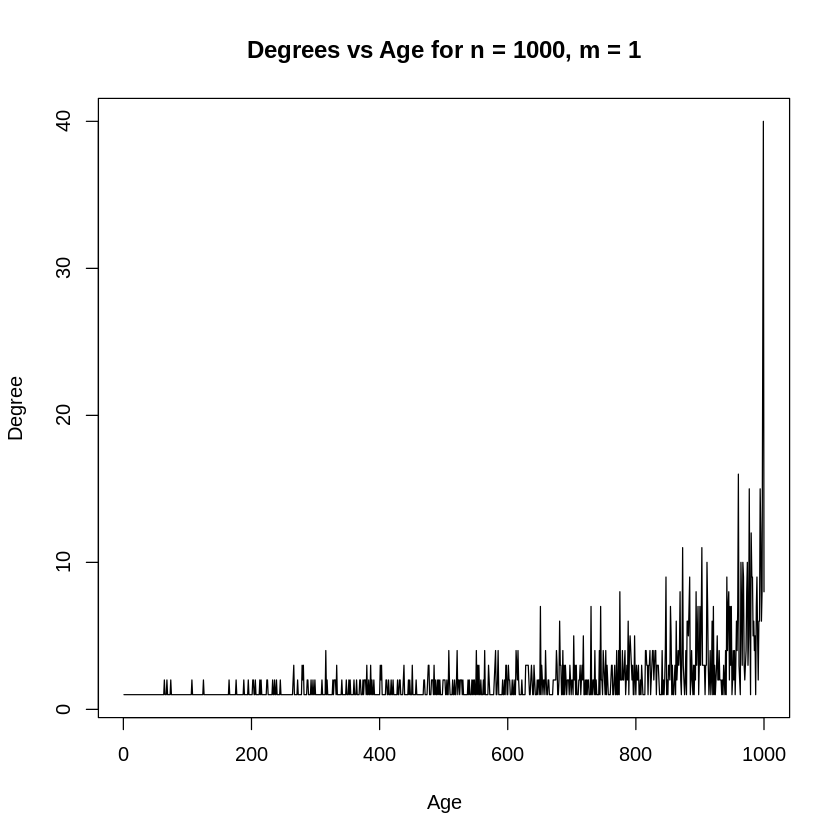

In [14]:
graphCommunityPlotSlope(1000, 1)

(c)

[1] "Total number of Barabasi graphs generated: 10000, Number of connected graphs: 10000"
[1] "Modularity: 0.97814"


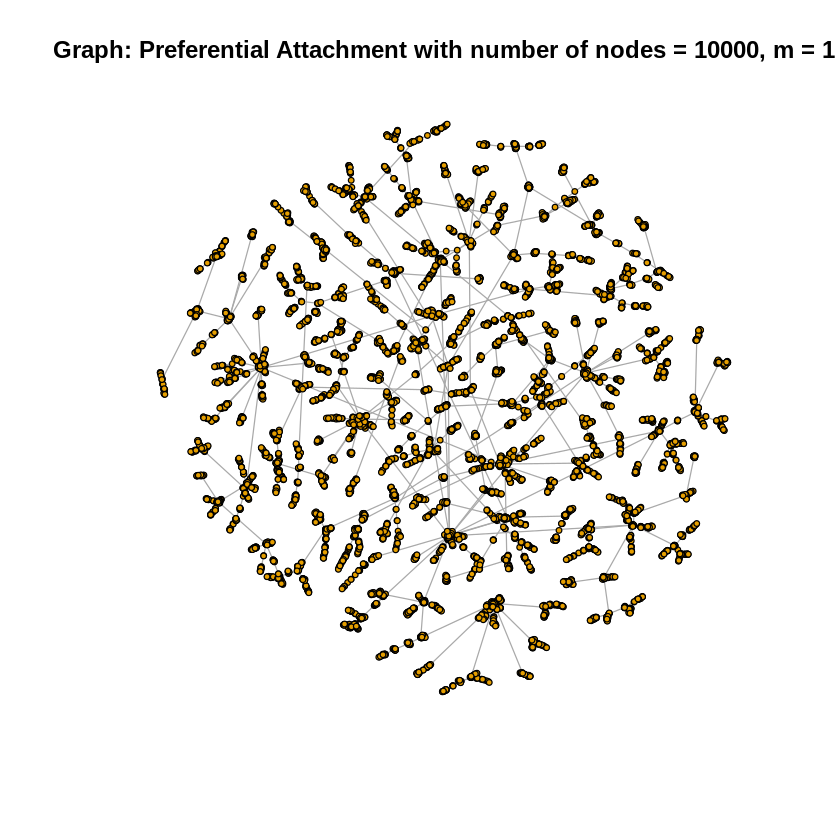

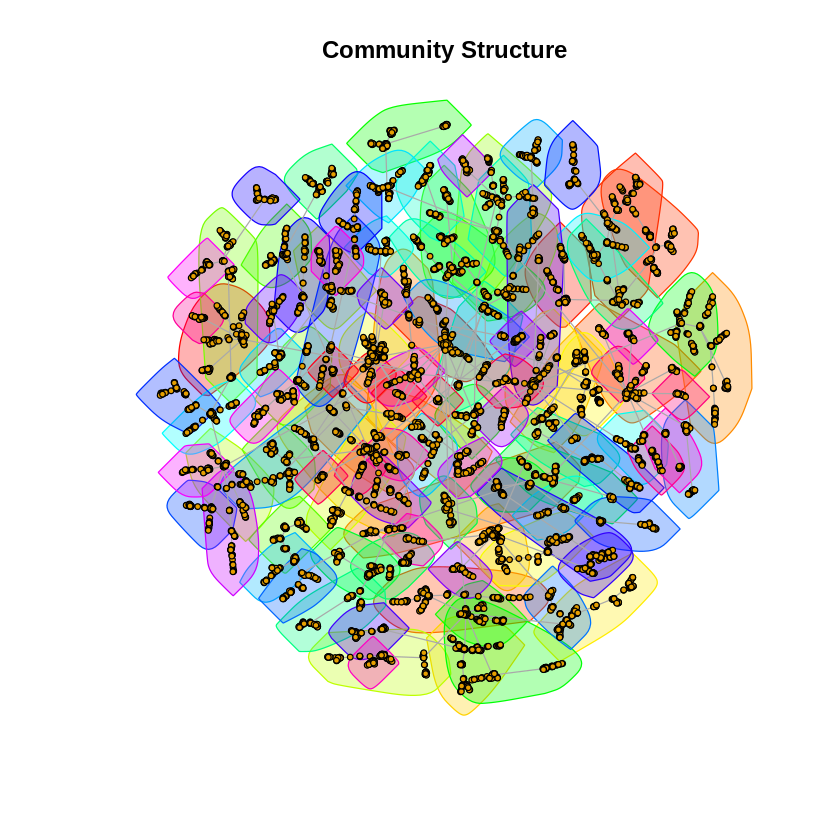


Call:
lm(formula = logDistribution ~ logDegree)

Coefficients:
(Intercept)    logDegree  
      1.561       -2.862  



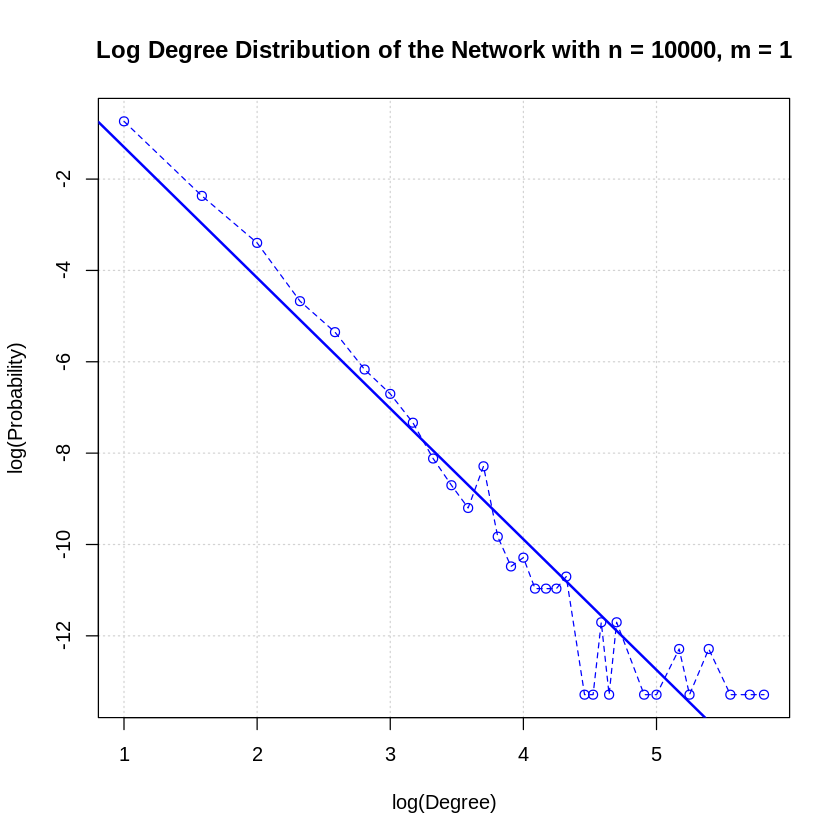


Call:
lm(formula = distributionNodes ~ degreeNodes)

Coefficients:
(Intercept)  degreeNodes  
     -1.098       -1.501  



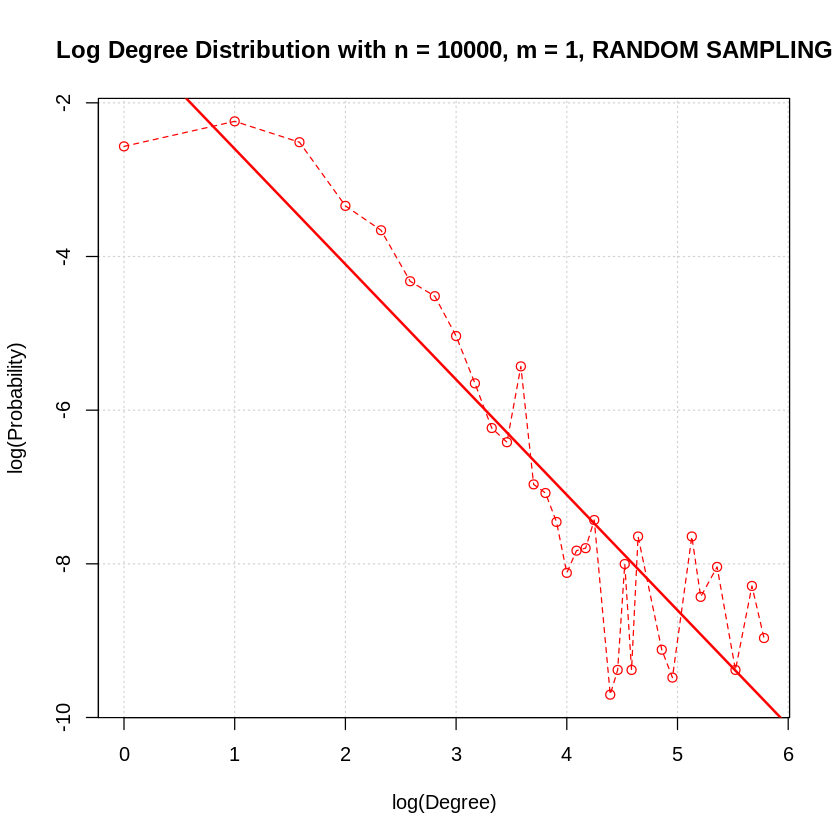

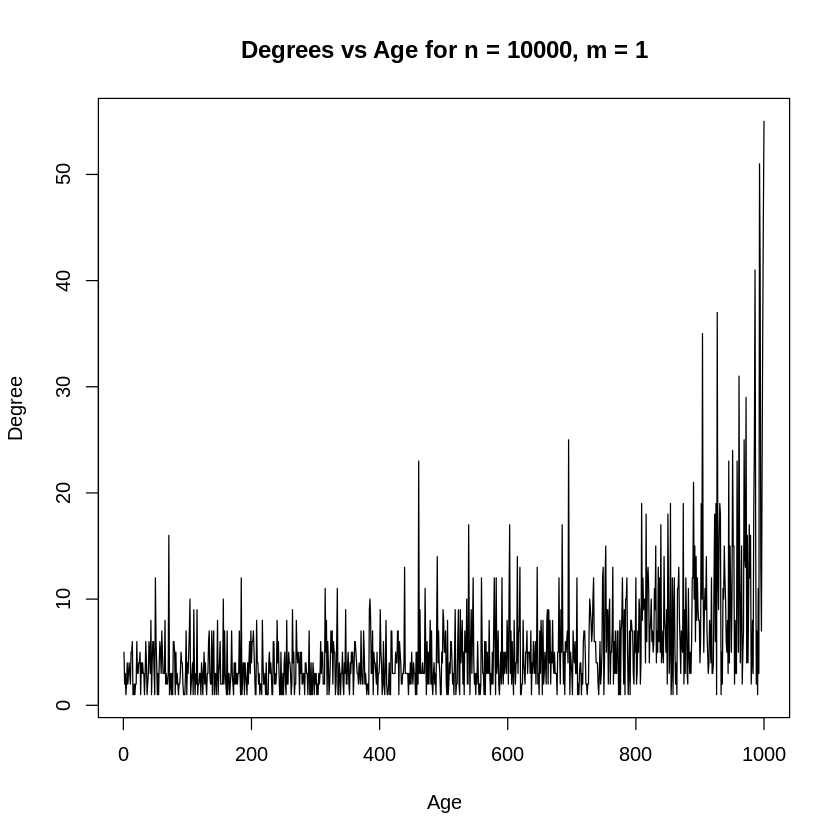

In [15]:
graphCommunityPlotSlope(10000, 1)

(g)

[1] "Total number of Barabasi graphs generated: 1000, Number of connected graphs: 1000"
[1] "Modularity: 0.52423"


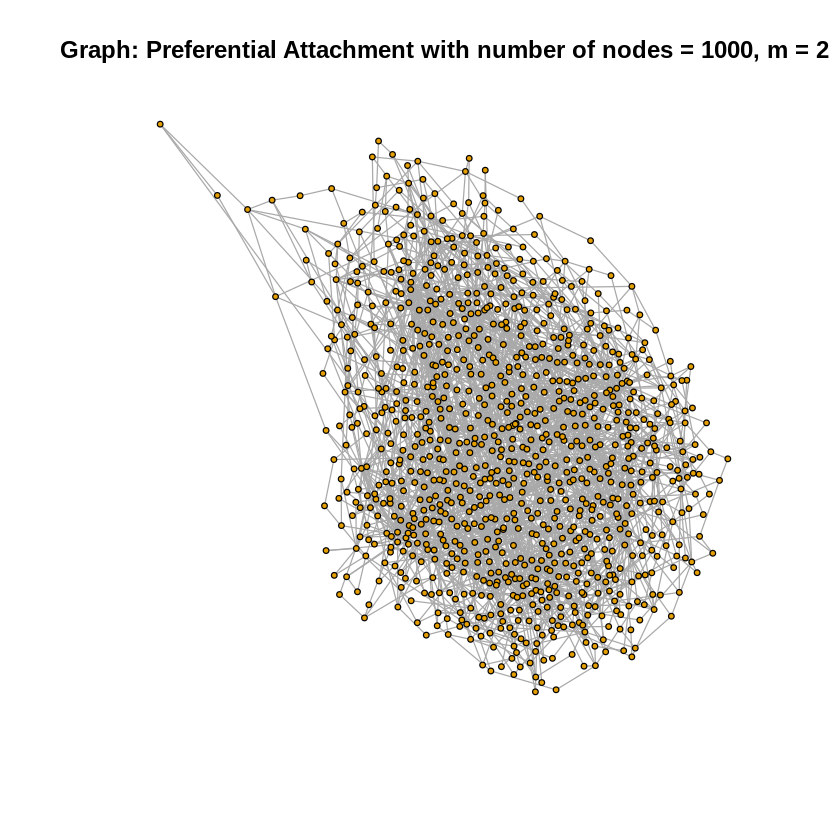

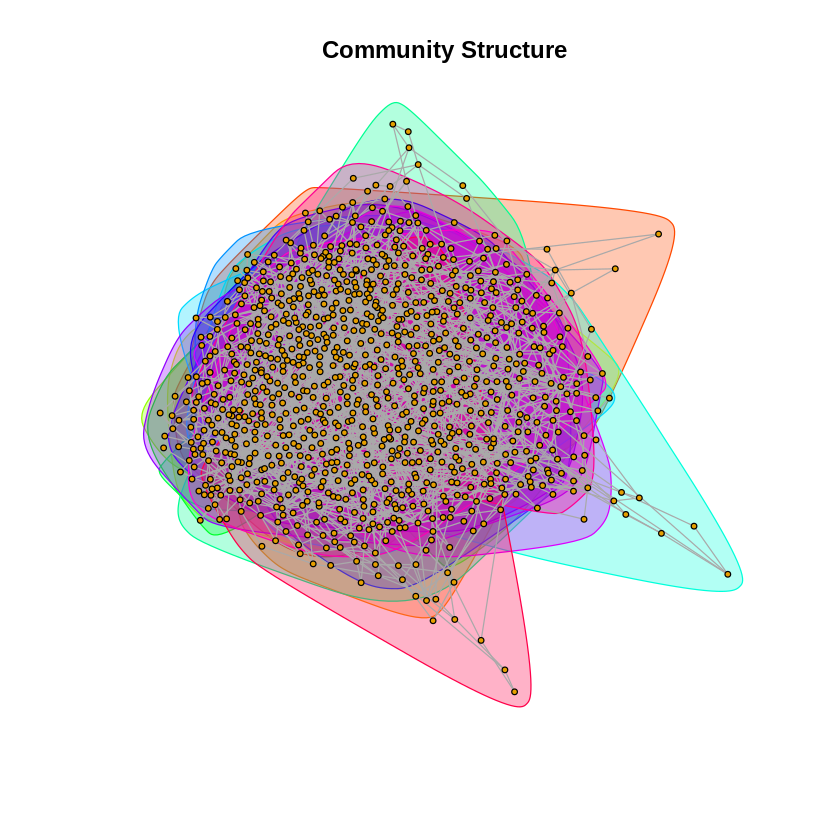


Call:
lm(formula = logDistribution ~ logDegree)

Coefficients:
(Intercept)    logDegree  
      1.654       -2.351  



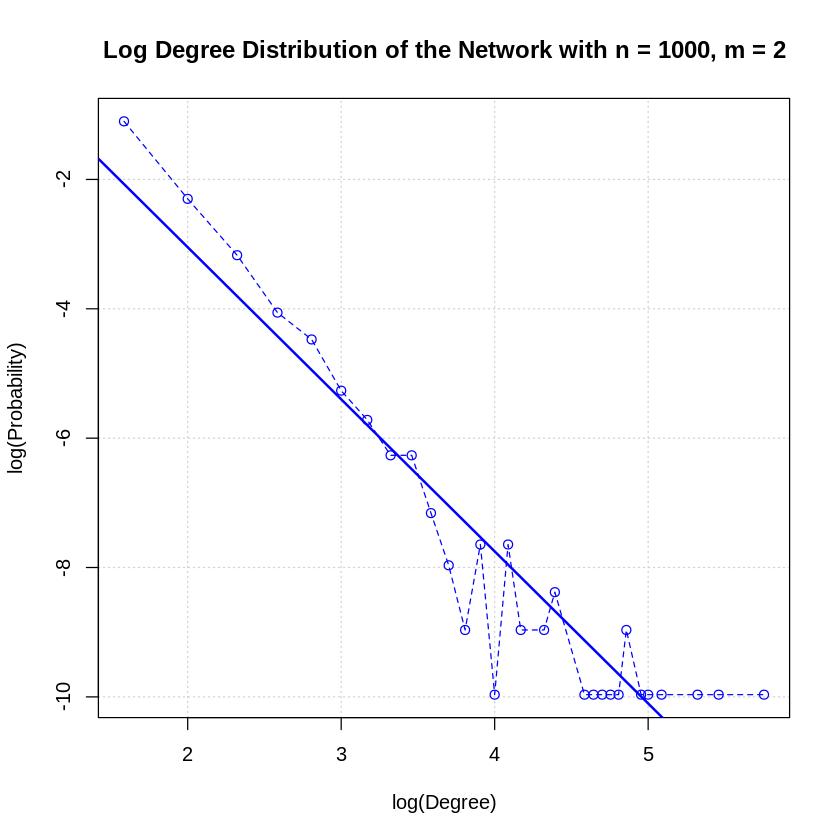


Call:
lm(formula = distributionNodes ~ degreeNodes)

Coefficients:
(Intercept)  degreeNodes  
     -1.566       -1.088  



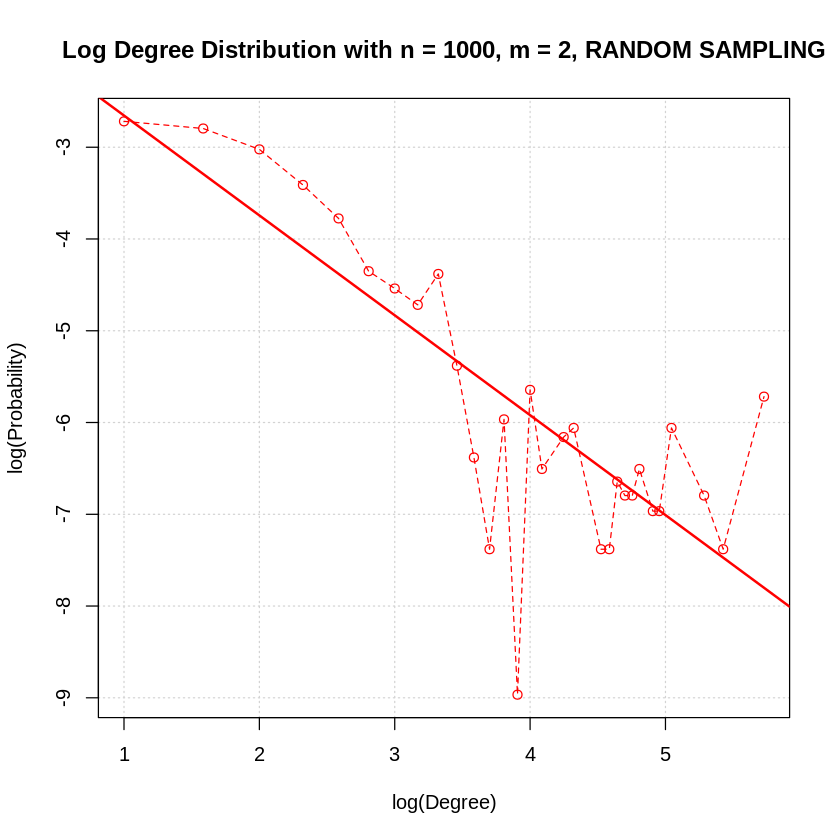

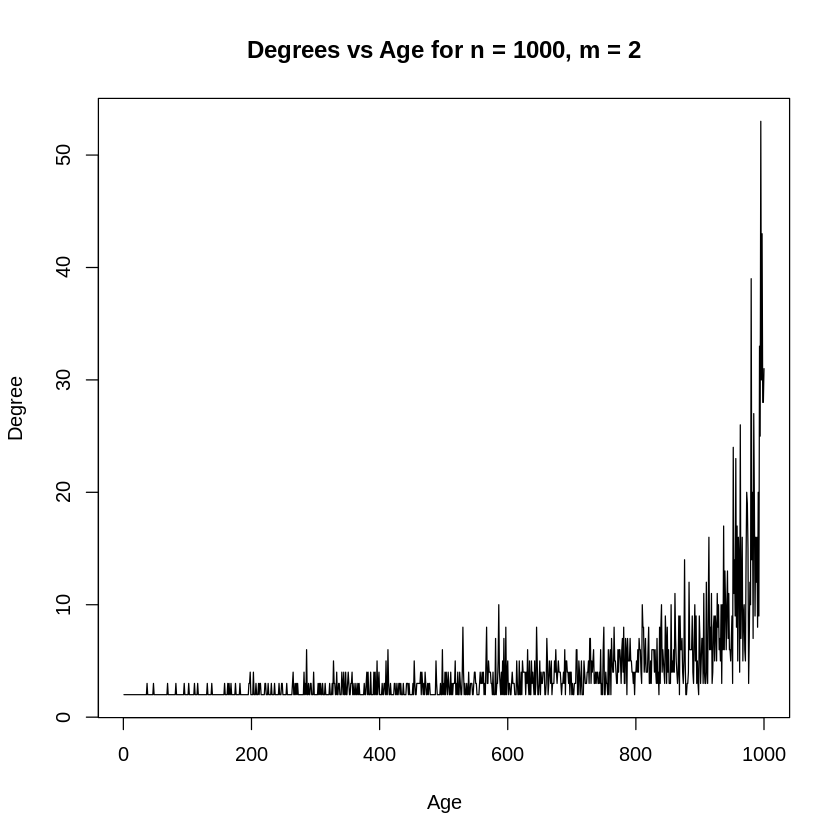

In [16]:
graphCommunityPlotSlope(1000, 2)

[1] "Total number of Barabasi graphs generated: 10000, Number of connected graphs: 10000"
[1] "Modularity: 0.52961"


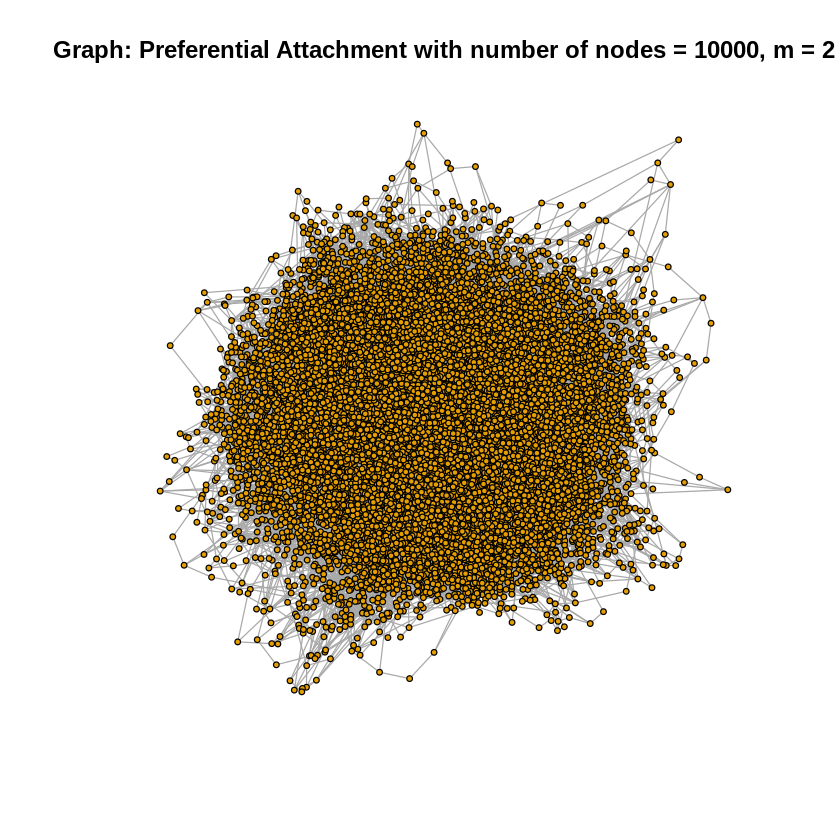

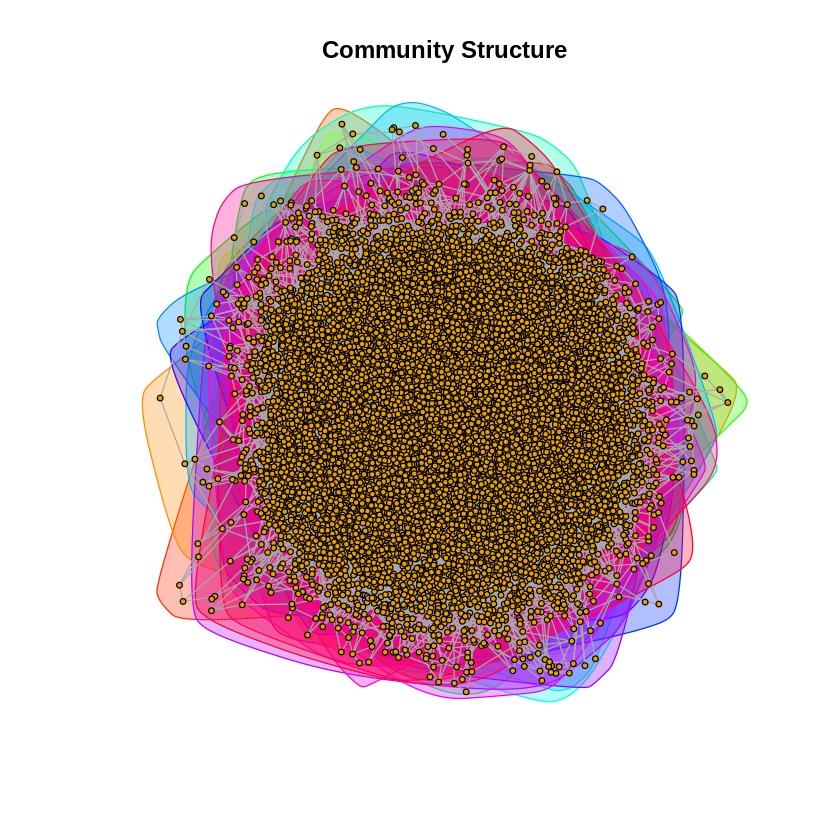


Call:
lm(formula = logDistribution ~ logDegree)

Coefficients:
(Intercept)    logDegree  
      1.597       -2.491  



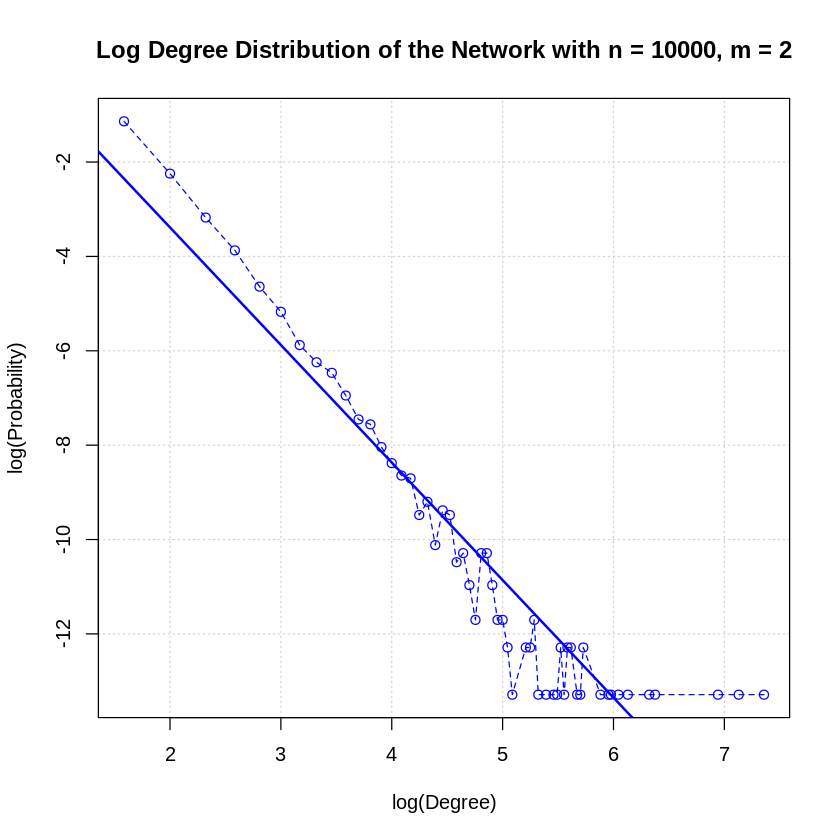


Call:
lm(formula = distributionNodes ~ degreeNodes)

Coefficients:
(Intercept)  degreeNodes  
     -1.066       -1.383  



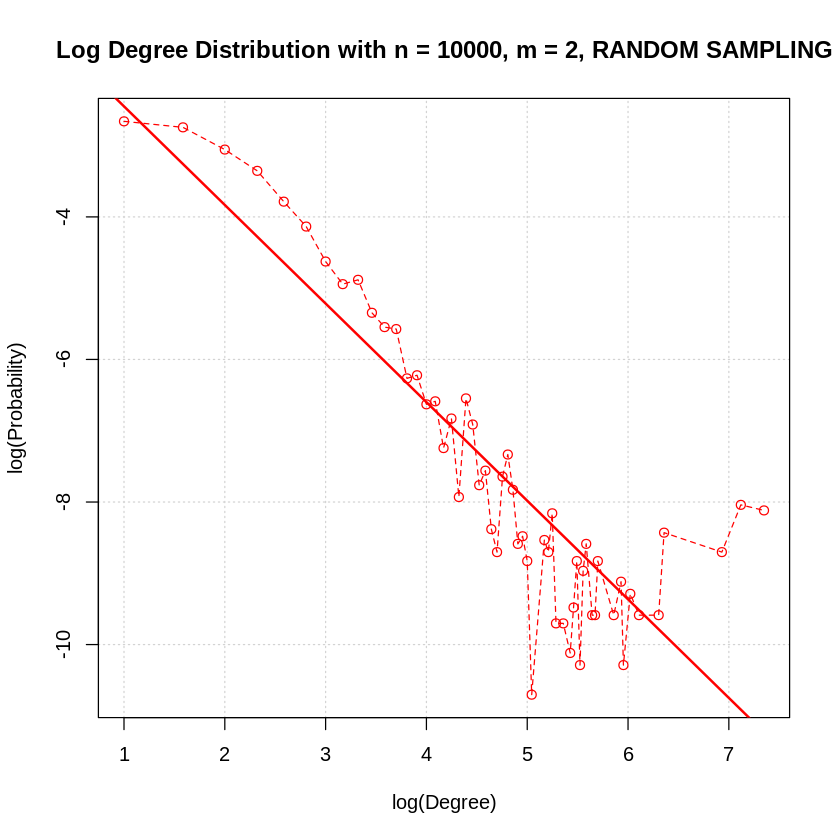

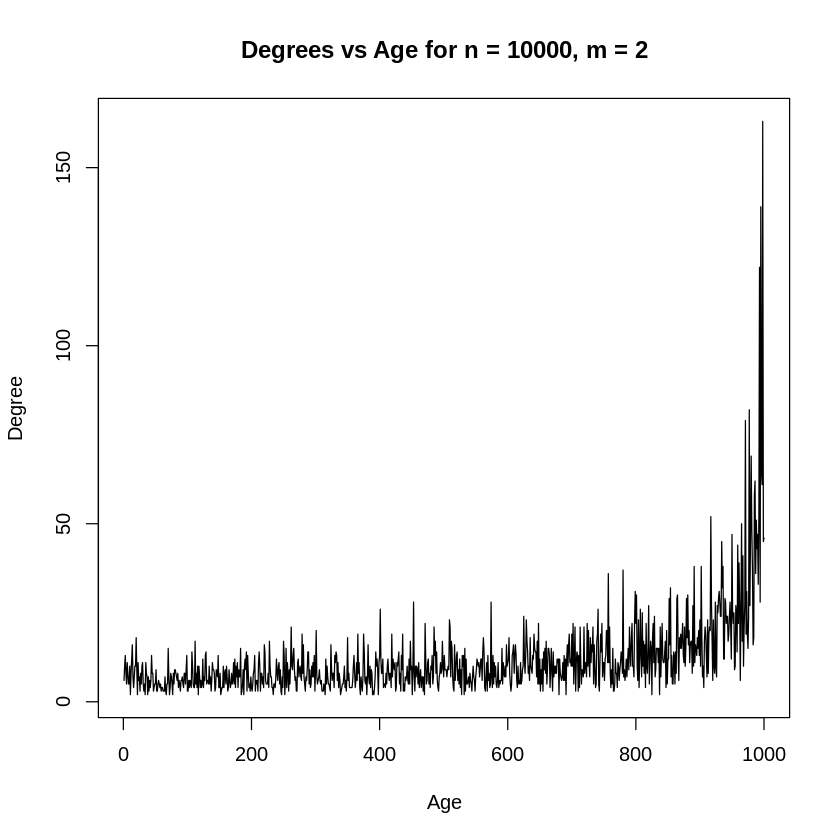

In [17]:
graphCommunityPlotSlope(10000, 2)

[1] "Total number of Barabasi graphs generated: 1000, Number of connected graphs: 1000"
[1] "Modularity: 0.27642"


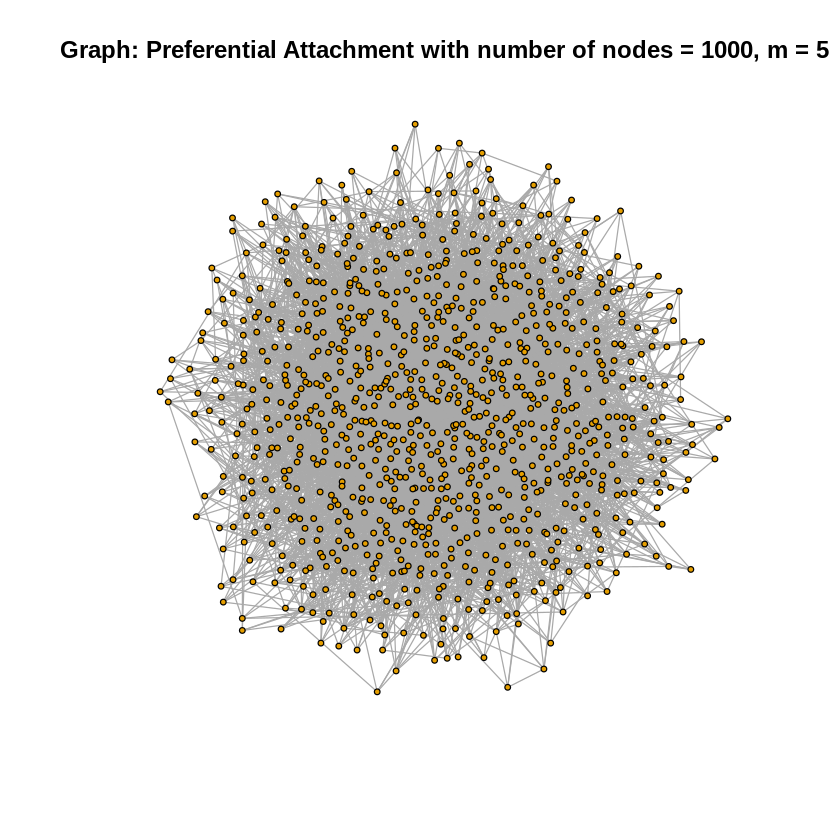

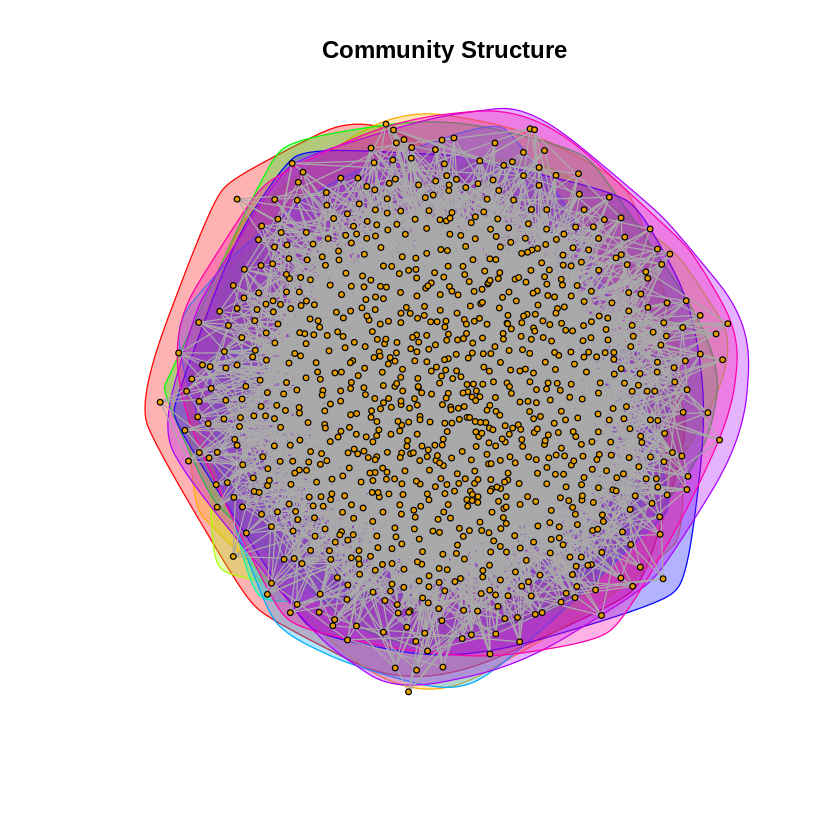


Call:
lm(formula = logDistribution ~ logDegree)

Coefficients:
(Intercept)    logDegree  
      2.333       -2.103  



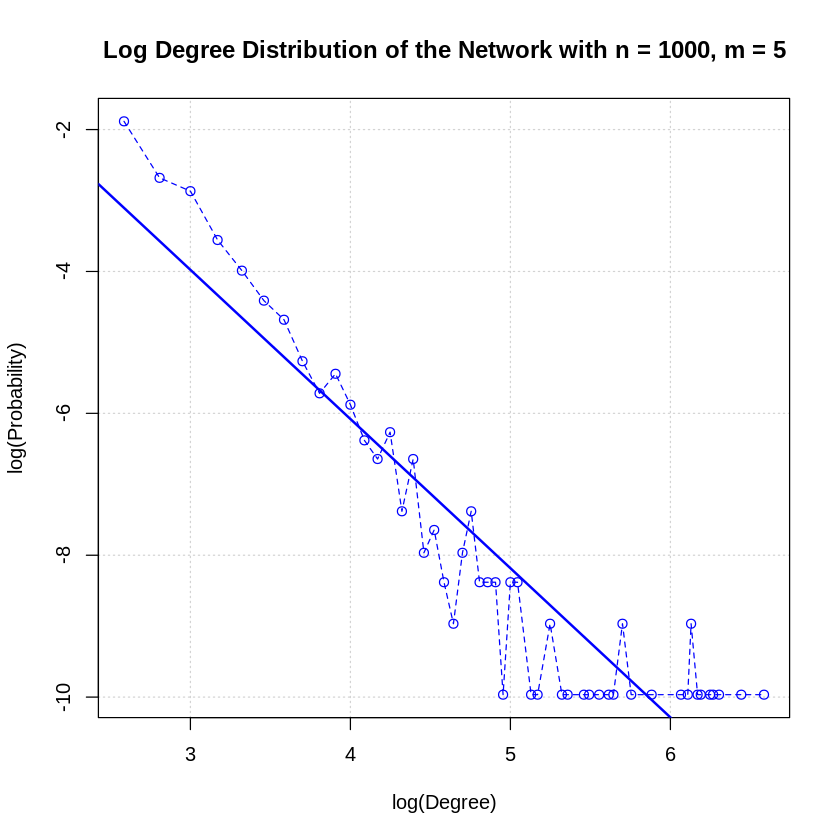


Call:
lm(formula = distributionNodes ~ degreeNodes)

Coefficients:
(Intercept)  degreeNodes  
     -1.456       -1.063  



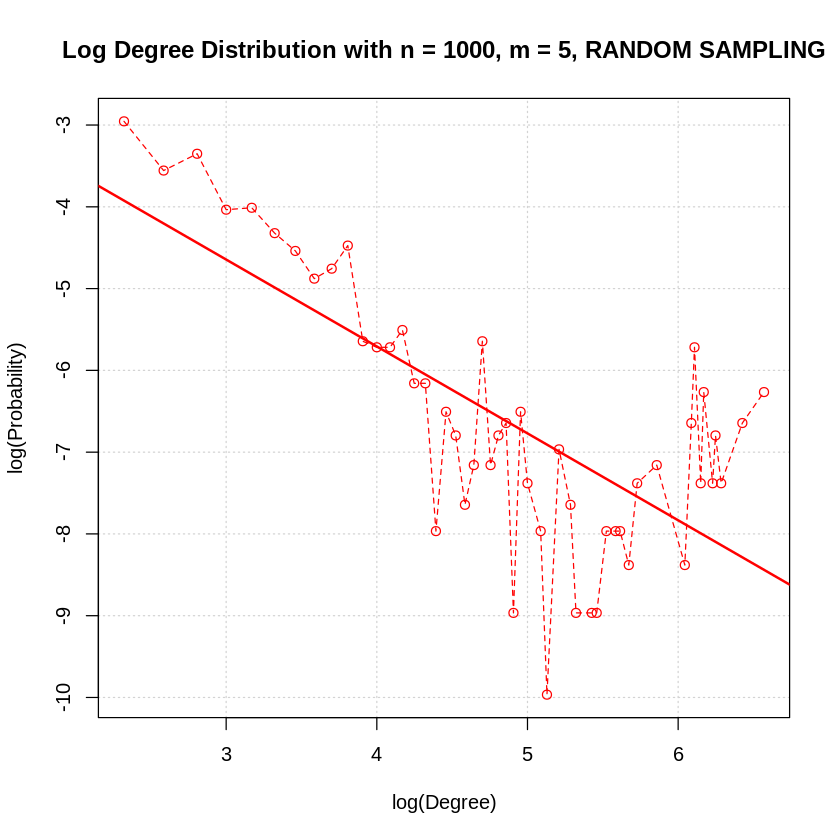

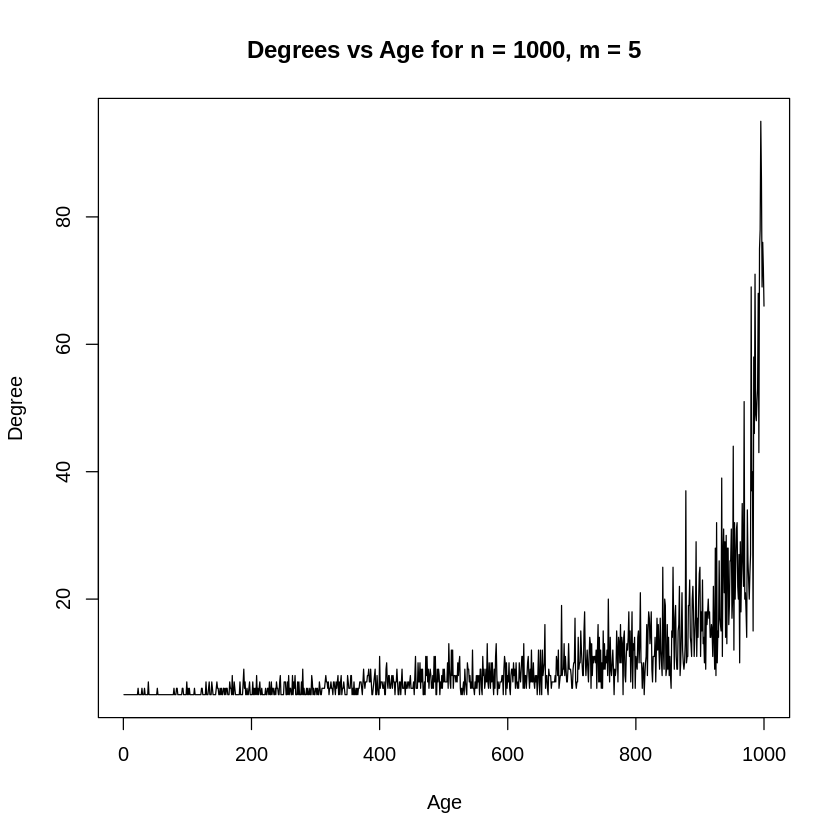

In [18]:
graphCommunityPlotSlope(1000, 5)

[1] "Total number of Barabasi graphs generated: 10000, Number of connected graphs: 10000"
[1] "Modularity: 0.27752"


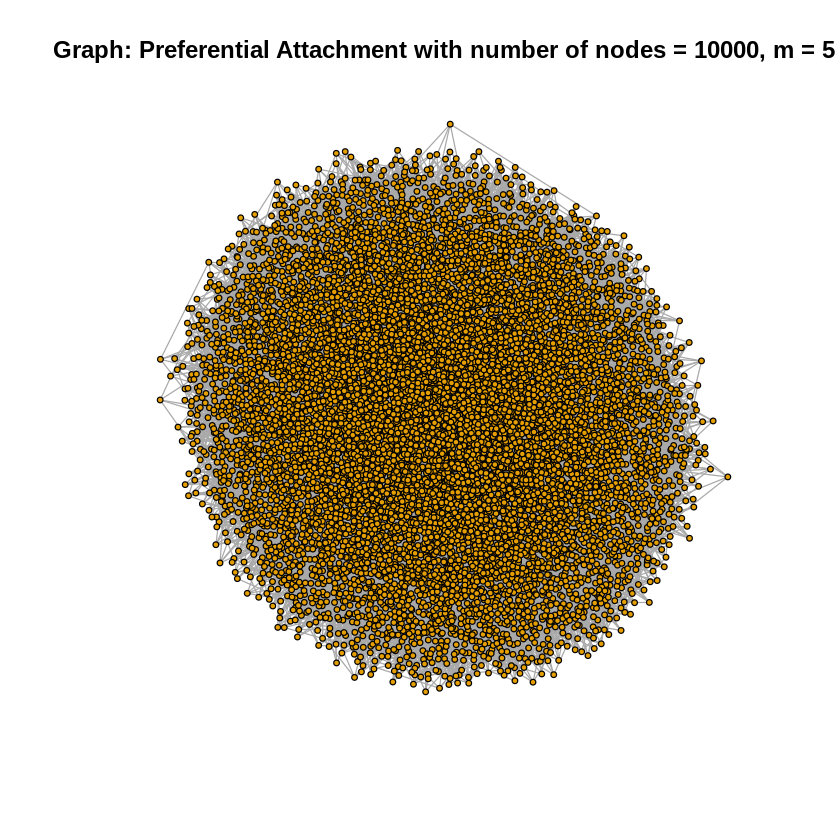

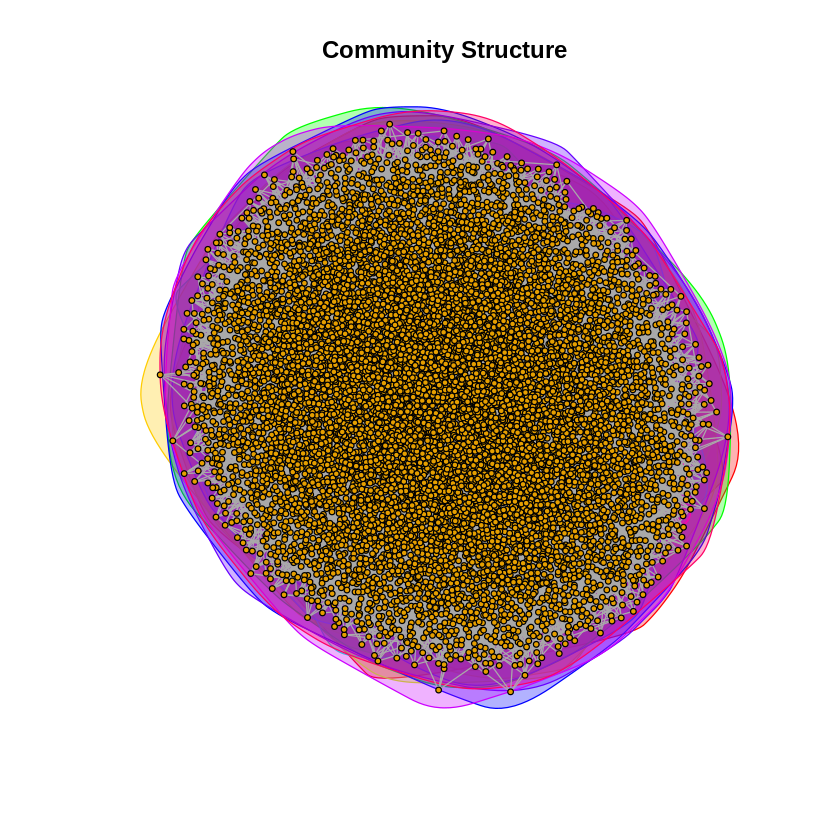


Call:
lm(formula = logDistribution ~ logDegree)

Coefficients:
(Intercept)    logDegree  
      2.356       -2.256  



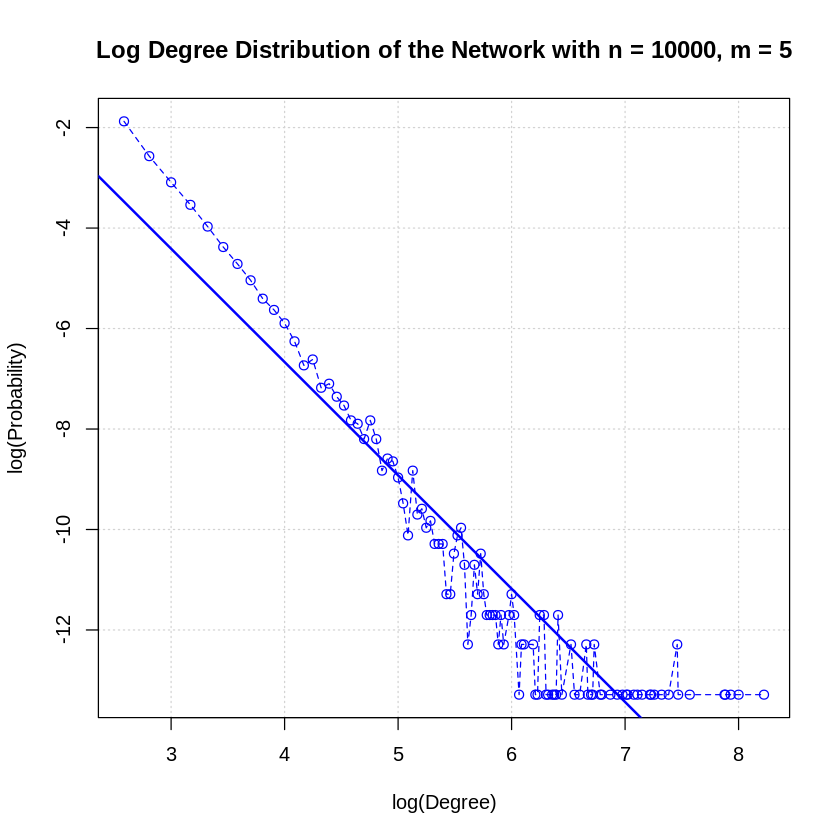


Call:
lm(formula = distributionNodes ~ degreeNodes)

Coefficients:
(Intercept)  degreeNodes  
     -1.338       -1.205  



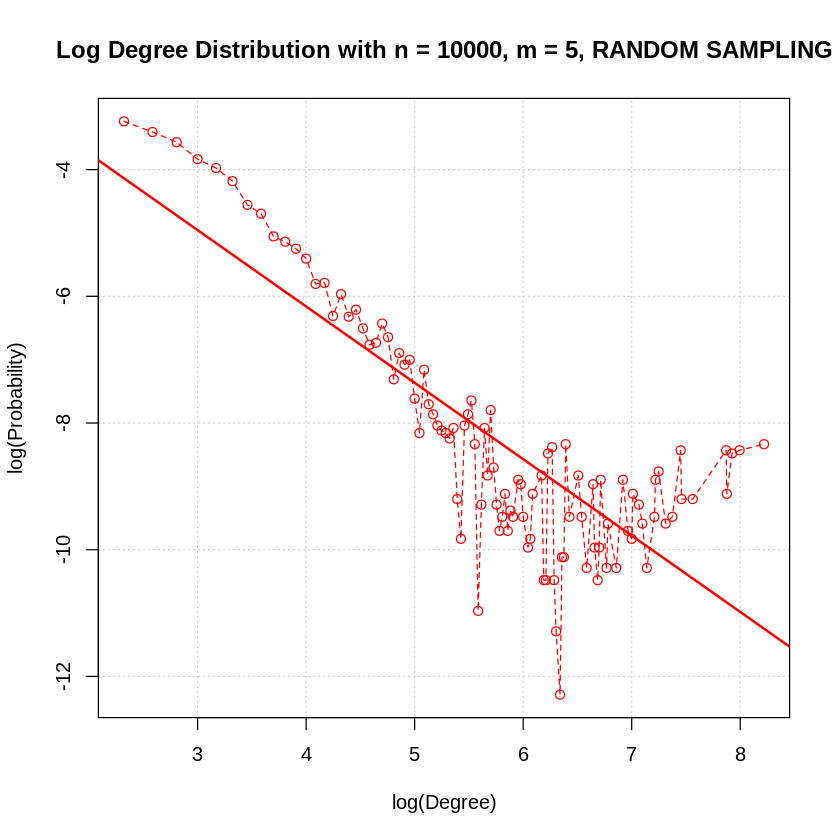

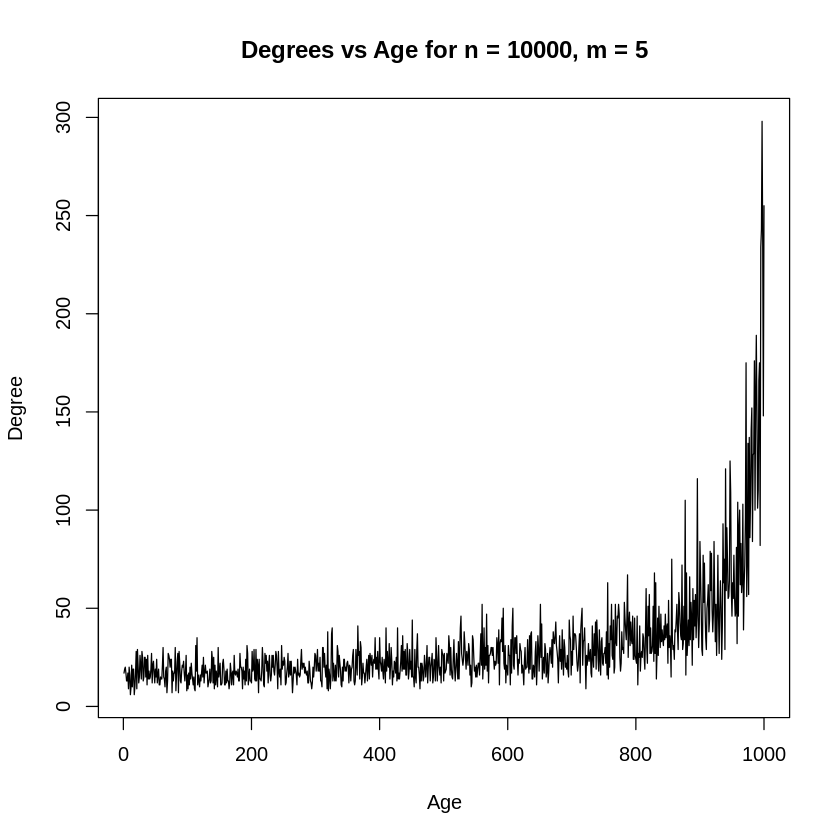

In [19]:
graphCommunityPlotSlope(10000, 5)

(h)

In [ ]:
nodes = 1000
m = 1

Original

[1] "Modularity: 0.93253"


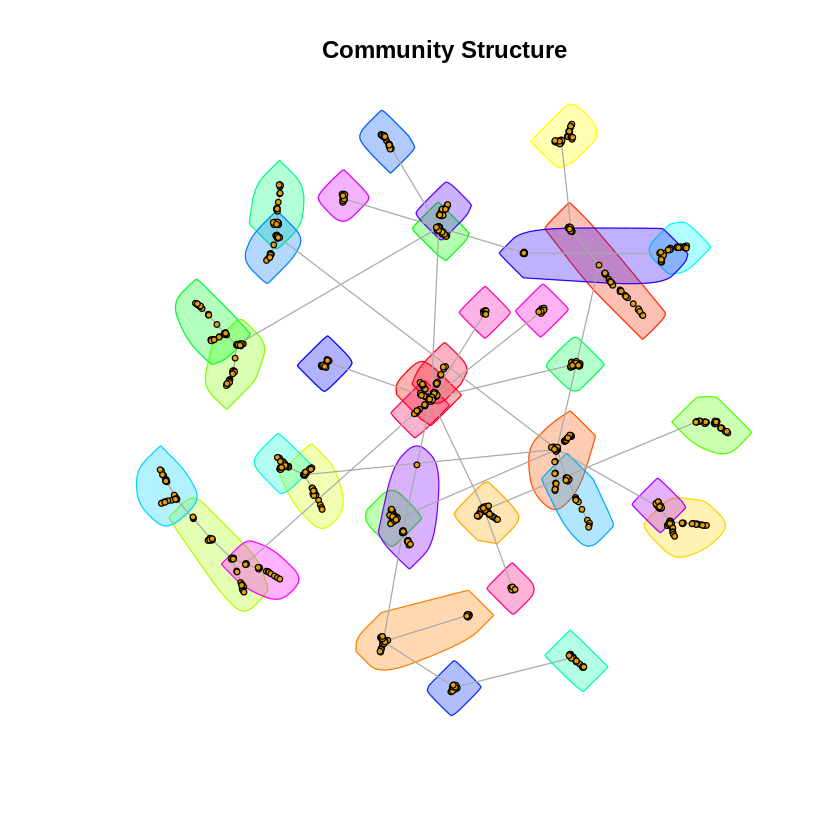

In [ ]:
OriginalGraph = sample_pa(nodes, m=m, directed=FALSE)
functionCommunityModularity(OriginalGraph)

Viger-Latapy

[1] "Modularity: 0.83146"


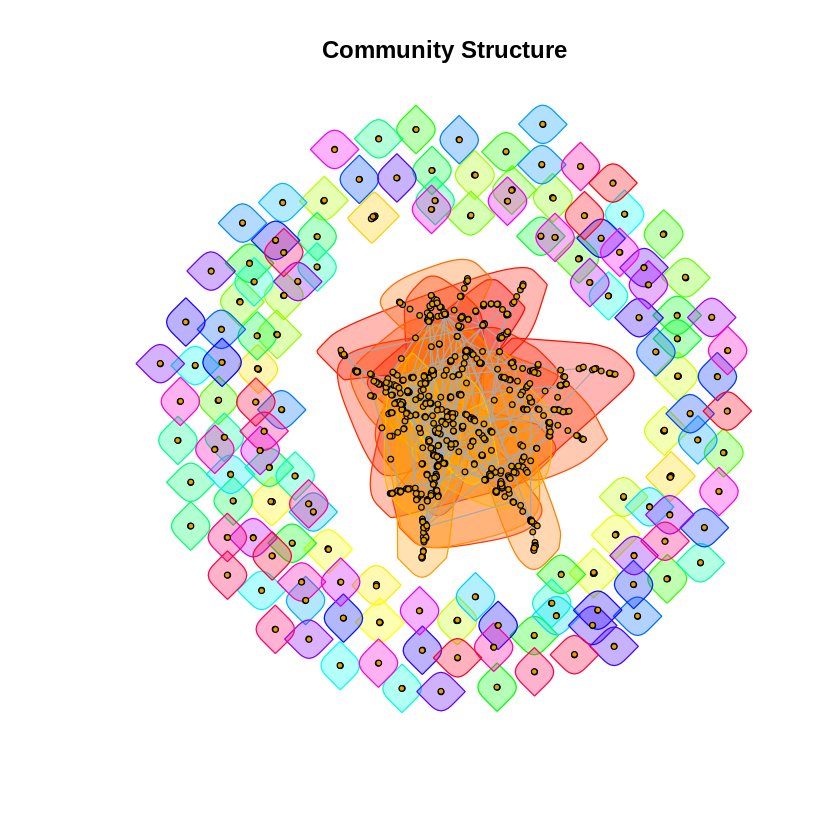

In [ ]:
VLStubMatchedGraph = sample_degseq(degree(OriginalGraph), method="vl")
functionCommunityModularity(VLStubMatchedGraph)

Simple, Not Multiple

[1] "Modularity: 0.83146"


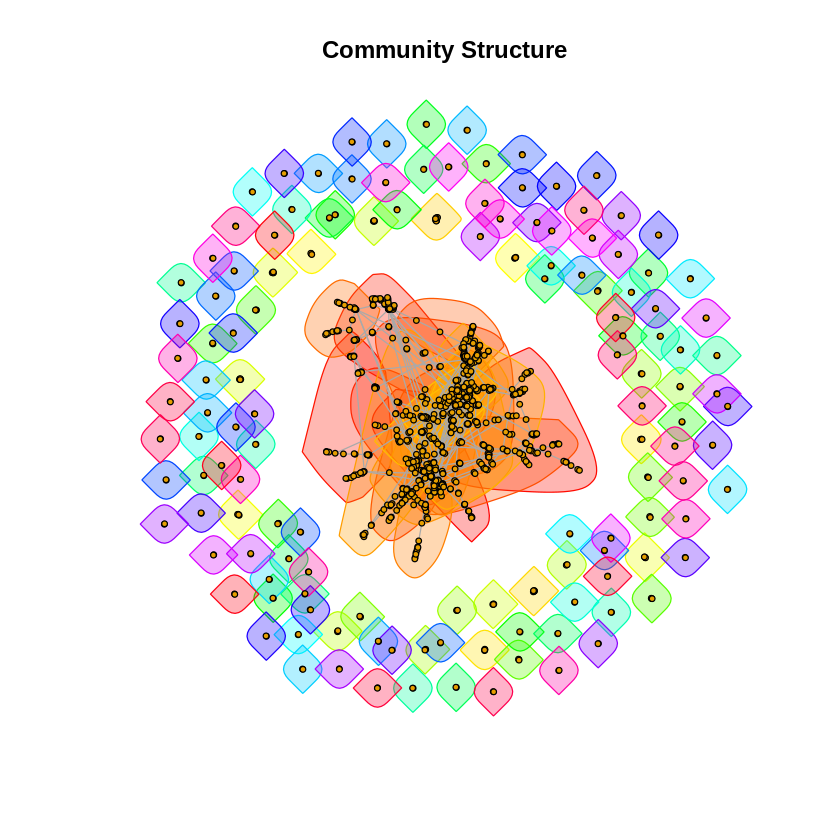

In [ ]:
StubMatchedGraph = sample_degseq(degree(OriginalGraph), method="simple.no.multiple")
functionCommunityModularity(StubMatchedGraph)

Simple

[1] "Modularity: 0.83146"


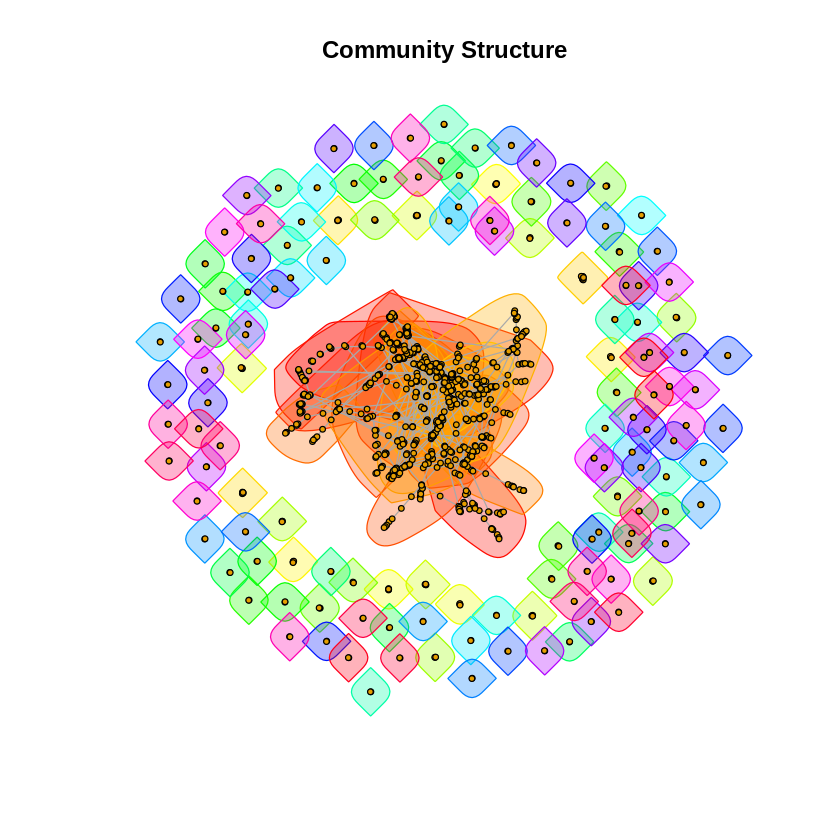

In [ ]:
SimpleStubMatchedGraph = sample_degseq(degree(OriginalGraph), method="simple")
functionCommunityModularity(SimpleStubMatchedGraph)

# Question 3

(a)

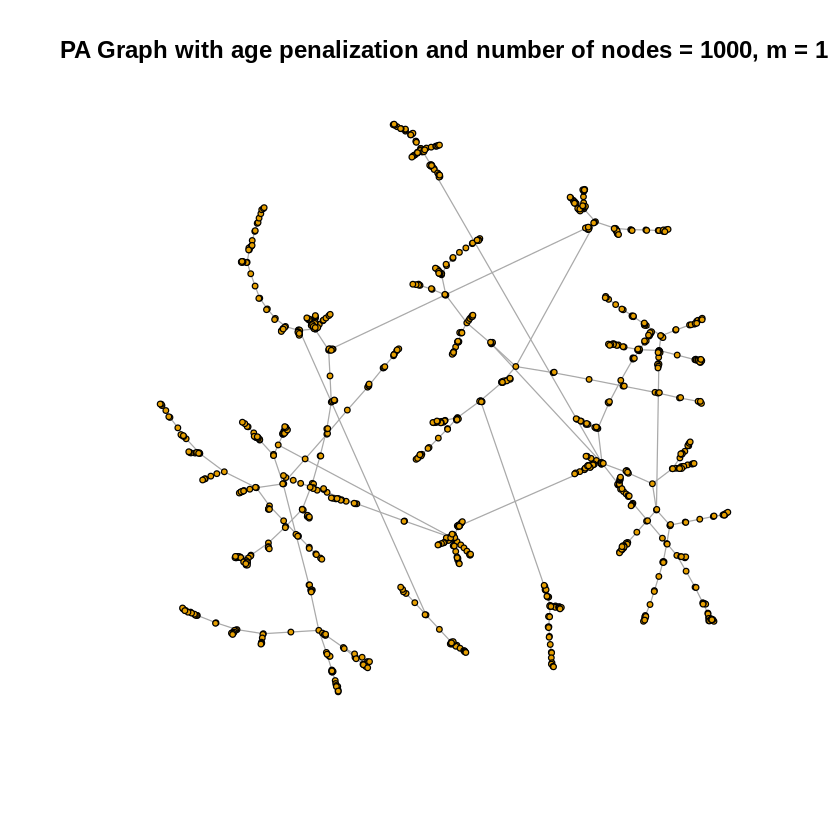

In [20]:
nodes = 1000
m = 1
ageGraph <- sample_pa_age(n=nodes, directed = FALSE, m=1, pa.exp=1, aging.exp=-1, 
                   zero.deg.appeal = 1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1)
plot(ageGraph, 
        edge.arrow.size=.1, 
        vertex.size=2, 
        vertex.label=NA,
        main=sprintf("PA Graph with age penalization and number of nodes = %d, m = %d", nodes, m)
    )

(a) Degree Distribution


Call:
lm(formula = logDistribution ~ logDegree)

Coefficients:
(Intercept)    logDegree  
      2.859       -3.239  



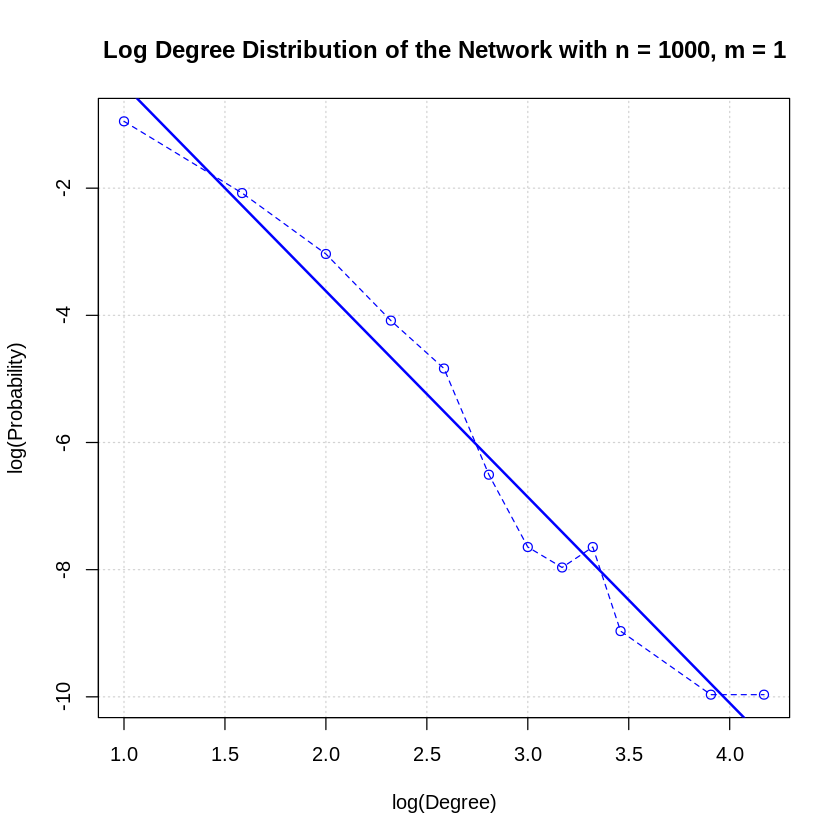

In [21]:
functionDegreeDistIntercept(ageGraph, nodes, m)

(b)

[1] "Modularity: 0.93518"


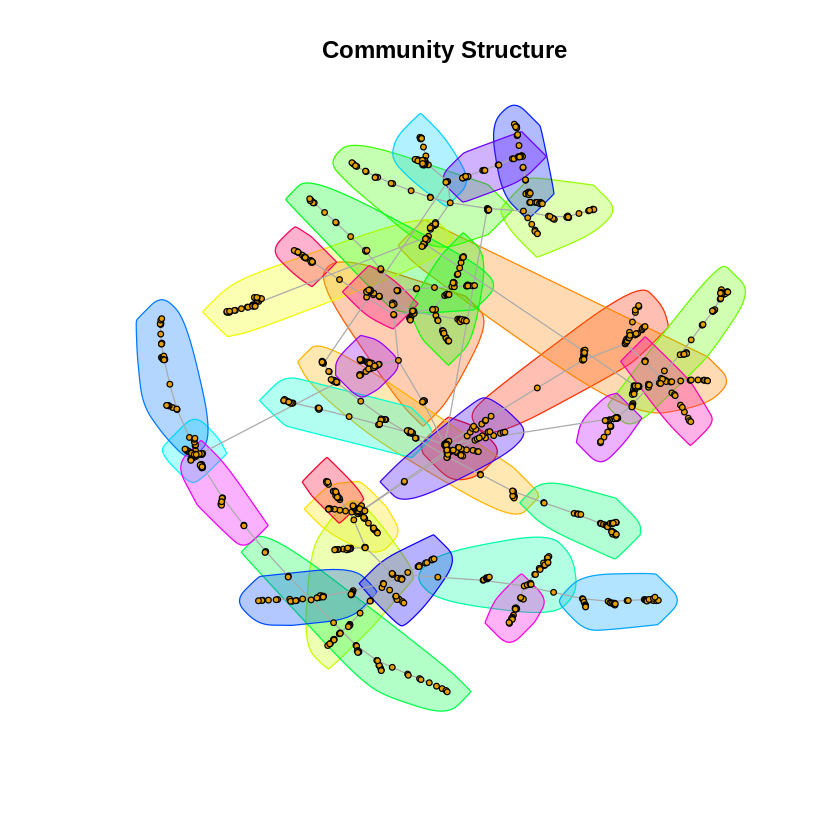

In [22]:
functionCommunityModularity(ageGraph)